In [ ]:
from sklearn.datasets import fetch_openml
import os
import seaborn as sns; sns.set()
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from google.colab import drive
#drive.mount('/content/drive')
import joblib

In [ ]:
credit_data = fetch_openml(name='credit-g',version=1, as_frame=True)

In [ ]:
type(credit_data)

sklearn.utils._bunch.Bunch

In [ ]:
credit_data.feature_names

['checking_status',
 'duration',
 'credit_history',
 'purpose',
 'credit_amount',
 'savings_status',
 'employment',
 'installment_commitment',
 'personal_status',
 'other_parties',
 'residence_since',
 'property_magnitude',
 'age',
 'other_payment_plans',
 'housing',
 'existing_credits',
 'job',
 'num_dependents',
 'own_telephone',
 'foreign_worker']

In [ ]:
credit_data.target_names

['class']

In [ ]:
data_features = credit_data.data
data_target = credit_data.target

In [ ]:
data_features.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker
0,<0,6,critical/other existing credit,radio/tv,1169,no known savings,>=7,4,male single,none,4,real estate,67,none,own,2,skilled,1,yes,yes
1,0<=X<200,48,existing paid,radio/tv,5951,<100,1<=X<4,2,female div/dep/mar,none,2,real estate,22,none,own,1,skilled,1,none,yes
2,no checking,12,critical/other existing credit,education,2096,<100,4<=X<7,2,male single,none,3,real estate,49,none,own,1,unskilled resident,2,none,yes
3,<0,42,existing paid,furniture/equipment,7882,<100,4<=X<7,2,male single,guarantor,4,life insurance,45,none,for free,1,skilled,2,none,yes
4,<0,24,delayed previously,new car,4870,<100,1<=X<4,3,male single,none,4,no known property,53,none,for free,2,skilled,2,none,yes


In [ ]:
data_target.head()

,class
0,good
1,bad
2,good
3,good
4,bad


In [ ]:
data_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   checking_status         1000 non-null   category
 1   duration                1000 non-null   int64   
 2   credit_history          1000 non-null   category
 3   purpose                 1000 non-null   category
 4   credit_amount           1000 non-null   int64   
 5   savings_status          1000 non-null   category
 6   employment              1000 non-null   category
 7   installment_commitment  1000 non-null   int64   
 8   personal_status         1000 non-null   category
 9   other_parties           1000 non-null   category
 10  residence_since         1000 non-null   int64   
 11  property_magnitude      1000 non-null   category
 12  age                     1000 non-null   int64   
 13  other_payment_plans     1000 non-null   category
 14  housing                 1

In [ ]:
data_features.isnull().sum()

,0
checking_status,0
duration,0
credit_history,0
purpose,0
credit_amount,0
savings_status,0
employment,0
installment_commitment,0
personal_status,0
other_parties,0


In [ ]:
full_data = pd.concat([data_features, data_target], axis=1)

In [ ]:
full_data.describe().T

,count,mean,std,min,25%,50%,75%,max
duration,1000.00,20.90,12.06,4.00,12.00,18.00,24.00,72.00
credit_amount,1000.00,3271.26,2822.74,250.00,1365.50,2319.50,3972.25,18424.00
installment_commitment,1000.00,2.97,1.12,1.00,2.00,3.00,4.00,4.00
residence_since,1000.00,2.85,1.10,1.00,2.00,3.00,4.00,4.00
age,1000.00,35.55,11.38,19.00,27.00,33.00,42.00,75.00
existing_credits,1000.00,1.41,0.58,1.00,1.00,1.00,2.00,4.00
num_dependents,1000.00,1.16,0.36,1.00,1.00,1.00,1.00,2.00


In [ ]:
full_data.columns

Index(['checking_status', 'duration', 'credit_history', 'purpose',
       'credit_amount', 'savings_status', 'employment',
       'installment_commitment', 'personal_status', 'other_parties',
       'residence_since', 'property_magnitude', 'age', 'other_payment_plans',
       'housing', 'existing_credits', 'job', 'num_dependents', 'own_telephone',
       'foreign_worker', 'class'],
      dtype='object')

In [ ]:
no_num_features = len(full_data.select_dtypes(include='number').columns)
no_num_features

7

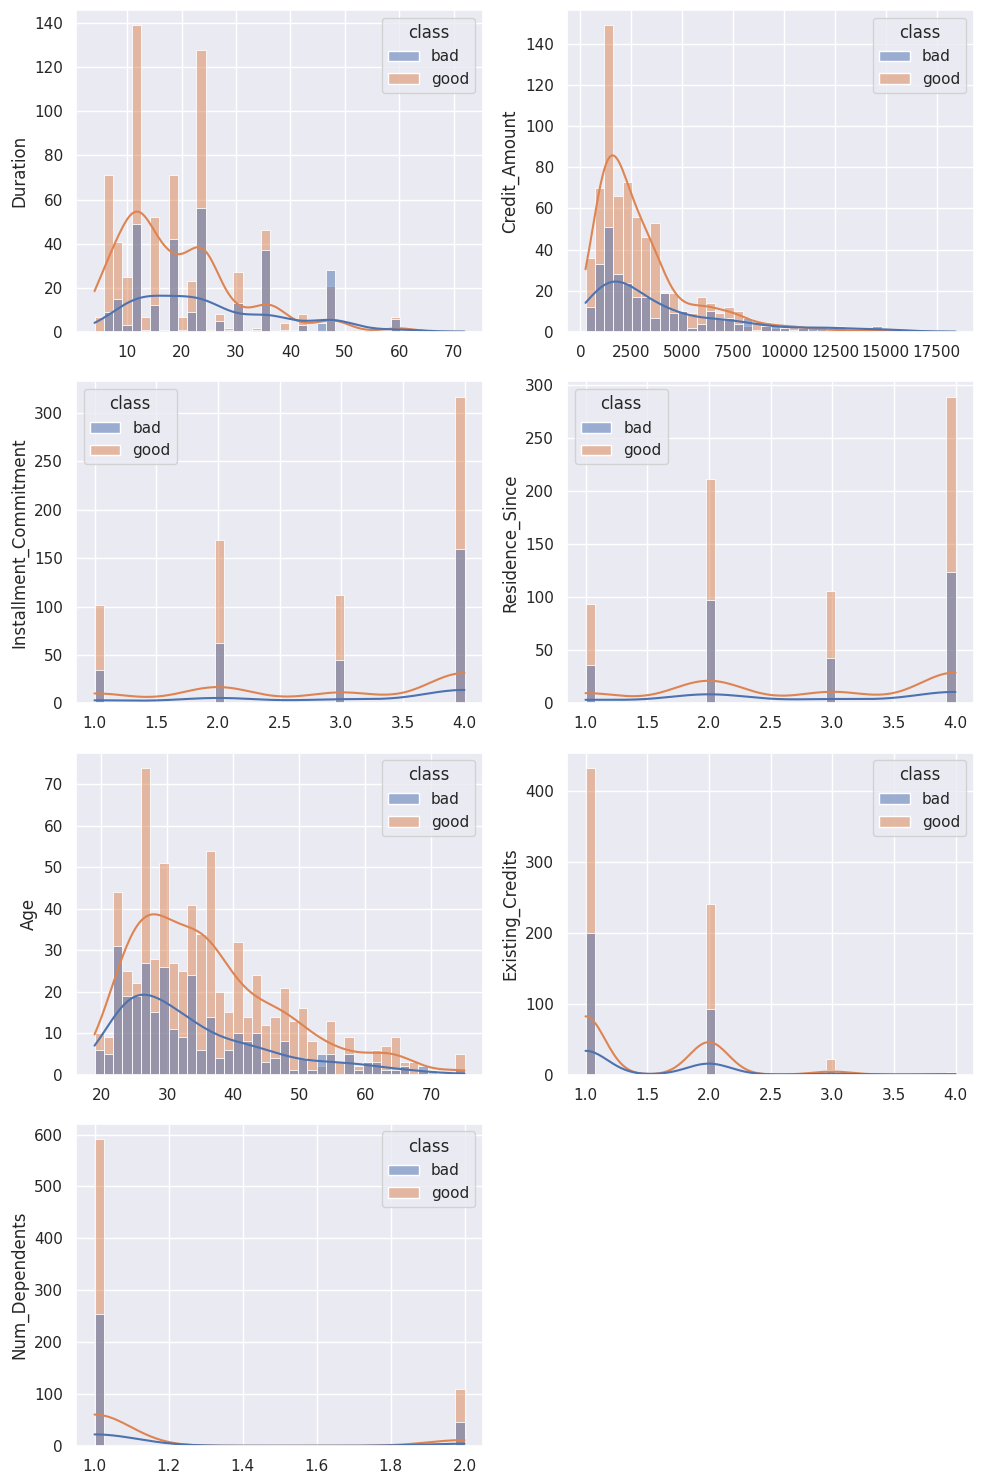

In [ ]:
## Distribution of numeric features
numeric_cols = full_data.select_dtypes(include='number').columns
hist_fig = plt.figure(figsize=(10, 15))
for i in range(no_num_features):
  plt.subplot(int((no_num_features+1)/2), 2, i+1)
  sns.histplot(full_data, kde=True, bins=40, x=numeric_cols[i], hue='class')
  plt.xlabel('')
  plt.ylabel(numeric_cols[i].title())
plt.tight_layout()
plt.show()



We can see that only three numerical features are continous; the others are discreted features.


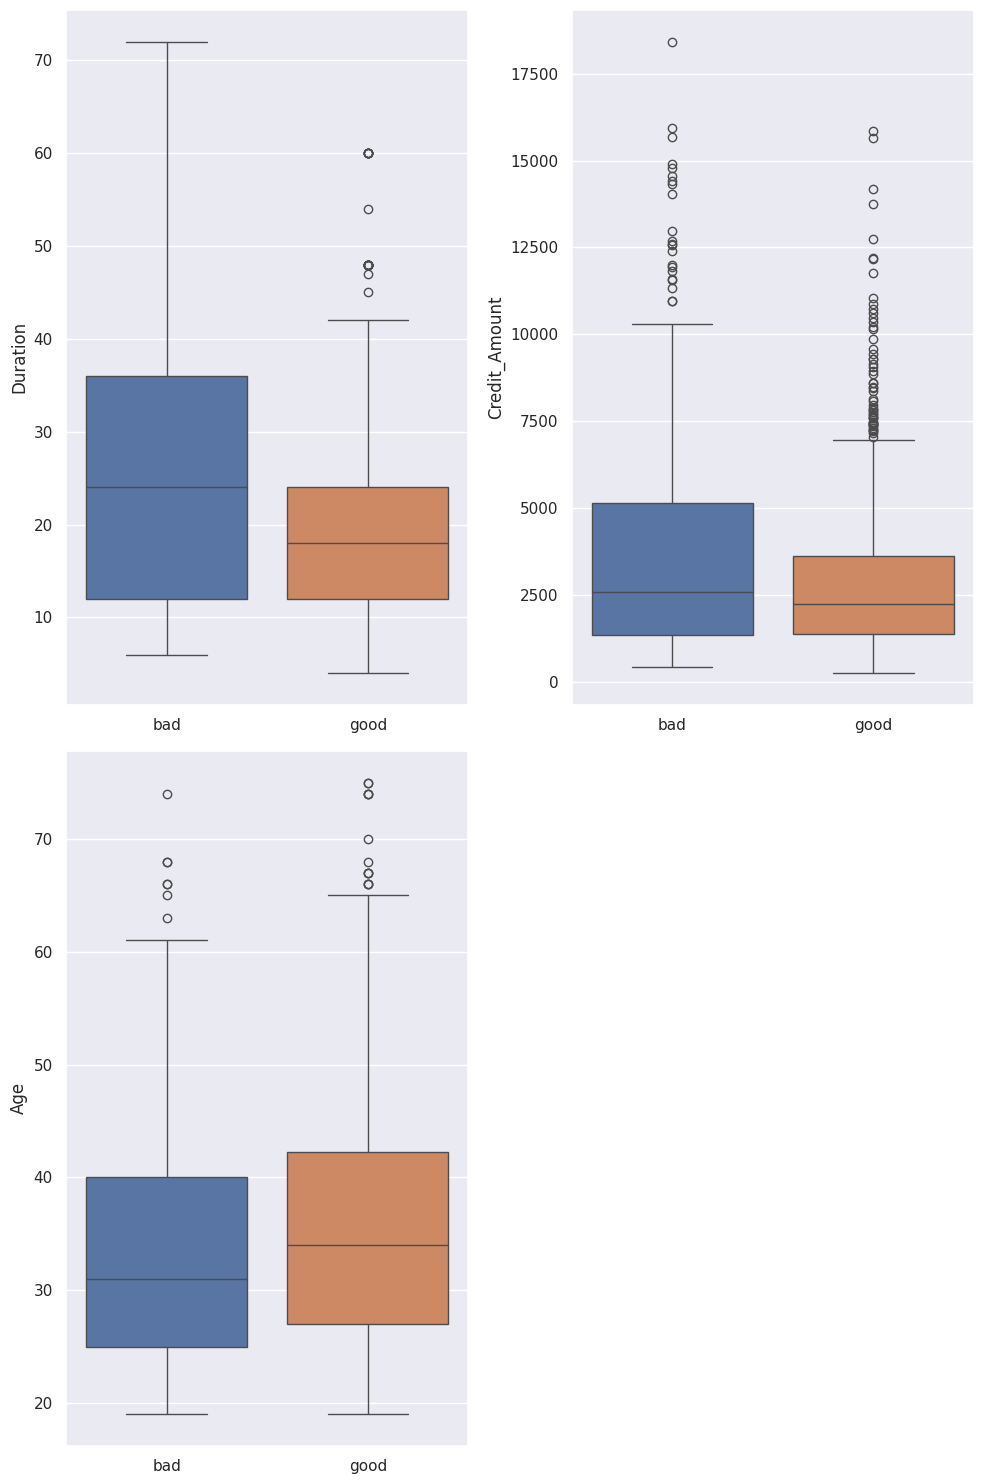

In [ ]:
### box plots to seen distribution
con_num_features = ['duration', 'credit_amount', 'age']
box_fig = plt.figure(figsize=(10, 15))
for i in range(len(con_num_features)):
  plt.subplot(int((len(con_num_features)+1)/2), 2, i+1)
  sns.boxplot(full_data, x='class', y=con_num_features[i], hue='class')
  plt.xlabel('')
  plt.ylabel(con_num_features[i].title())
  plt.tight_layout()


In [ ]:
#### correlation among numeric features 'duration', 'credit_amount', 'age'
con_num_features = ['duration', 'credit_amount', 'age']
corr_matrix = full_data[con_num_features].corr()
corr_matrix


,duration,credit_amount,age
duration,1.00,0.62,-0.04
credit_amount,0.62,1.00,0.03
age,-0.04,0.03,1.00


<Axes: >

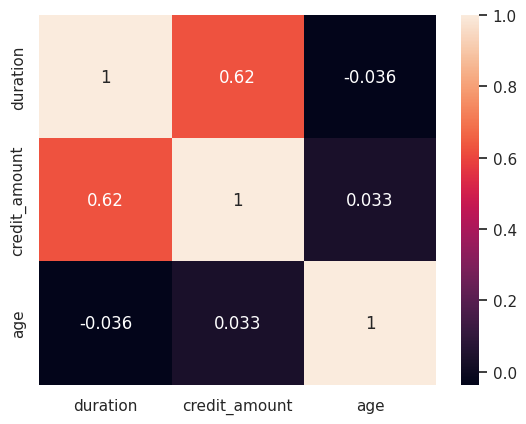

In [ ]:
sns.heatmap(corr_matrix, annot=True)

<Figure size 1000x1000 with 0 Axes>

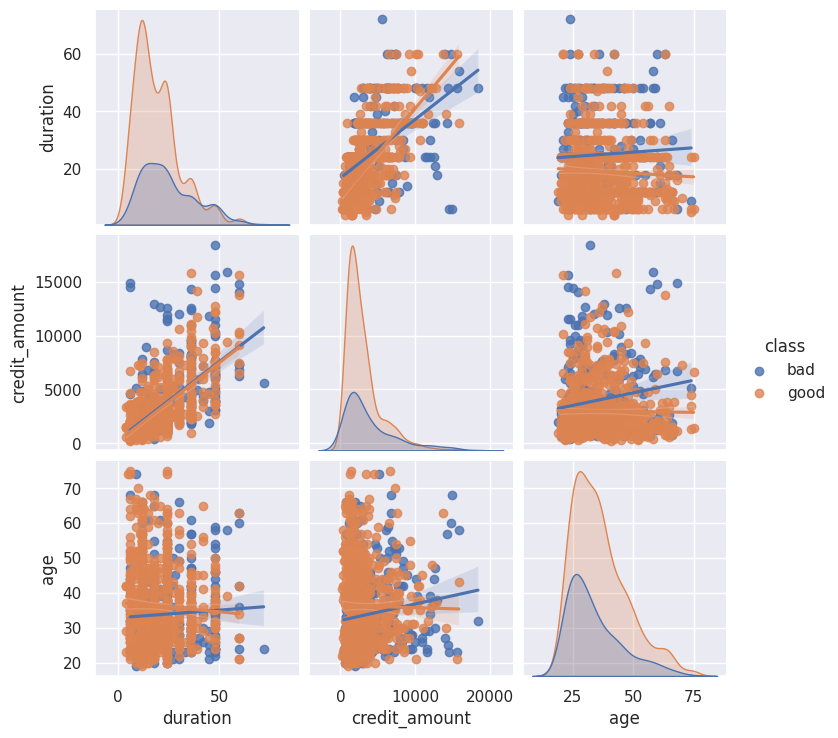

In [ ]:
### scatter plot to show correlation among the numeric features
###
plt.figure(figsize=(10,10))
numeric_cols_class = con_num_features + ['class']
sns.pairplot(full_data[numeric_cols_class], kind='reg', hue='class')

In [ ]:
numeric_cols_class

['duration', 'credit_amount', 'age', 'class']

In [ ]:
### Spaces and capitalized characters in the categorical features should be removed or replaced with "-"
cat_features = full_data.select_dtypes(include='category').columns

In [ ]:
for col in cat_features:
  # full_data[col] = full_data[col].str.lower().str.replace(' ', '_')
  full_data[col] = full_data[col].apply(lambda x: x.lower().replace(' ', '_'))

In [ ]:
full_data[cat_features].head()

,checking_status,credit_history,purpose,savings_status,employment,personal_status,other_parties,property_magnitude,other_payment_plans,housing,job,own_telephone,foreign_worker,class
0,<0,critical/other_existing_credit,radio/tv,no_known_savings,>=7,male_single,none,real_estate,none,own,skilled,yes,yes,good
1,0<=x<200,existing_paid,radio/tv,<100,1<=x<4,female_div/dep/mar,none,real_estate,none,own,skilled,none,yes,bad
2,no_checking,critical/other_existing_credit,education,<100,4<=x<7,male_single,none,real_estate,none,own,unskilled_resident,none,yes,good
3,<0,existing_paid,furniture/equipment,<100,4<=x<7,male_single,guarantor,life_insurance,none,for_free,skilled,none,yes,good
4,<0,delayed_previously,new_car,<100,1<=x<4,male_single,none,no_known_property,none,for_free,skilled,none,yes,bad


In [ ]:
nonnum_features = [col for col in full_data.columns if col not in con_num_features]
nonnum_features

['checking_status',
 'credit_history',
 'purpose',
 'savings_status',
 'employment',
 'installment_commitment',
 'personal_status',
 'other_parties',
 'residence_since',
 'property_magnitude',
 'other_payment_plans',
 'housing',
 'existing_credits',
 'job',
 'num_dependents',
 'own_telephone',
 'foreign_worker',
 'class']

In [ ]:
full_data[nonnum_features].head()

,checking_status,credit_history,purpose,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,critical/other_existing_credit,radio/tv,no_known_savings,>=7,4,male_single,none,4,real_estate,none,own,2,skilled,1,yes,yes,good
1,0<=x<200,existing_paid,radio/tv,<100,1<=x<4,2,female_div/dep/mar,none,2,real_estate,none,own,1,skilled,1,none,yes,bad
2,no_checking,critical/other_existing_credit,education,<100,4<=x<7,2,male_single,none,3,real_estate,none,own,1,unskilled_resident,2,none,yes,good
3,<0,existing_paid,furniture/equipment,<100,4<=x<7,2,male_single,guarantor,4,life_insurance,none,for_free,1,skilled,2,none,yes,good
4,<0,delayed_previously,new_car,<100,1<=x<4,3,male_single,none,4,no_known_property,none,for_free,2,skilled,2,none,yes,bad


In [ ]:
full_data[nonnum_features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   checking_status         1000 non-null   category
 1   credit_history          1000 non-null   category
 2   purpose                 1000 non-null   category
 3   savings_status          1000 non-null   category
 4   employment              1000 non-null   category
 5   installment_commitment  1000 non-null   int64   
 6   personal_status         1000 non-null   category
 7   other_parties           1000 non-null   category
 8   residence_since         1000 non-null   int64   
 9   property_magnitude      1000 non-null   category
 10  other_payment_plans     1000 non-null   category
 11  housing                 1000 non-null   category
 12  existing_credits        1000 non-null   int64   
 13  job                     1000 non-null   category
 14  num_dependents          1

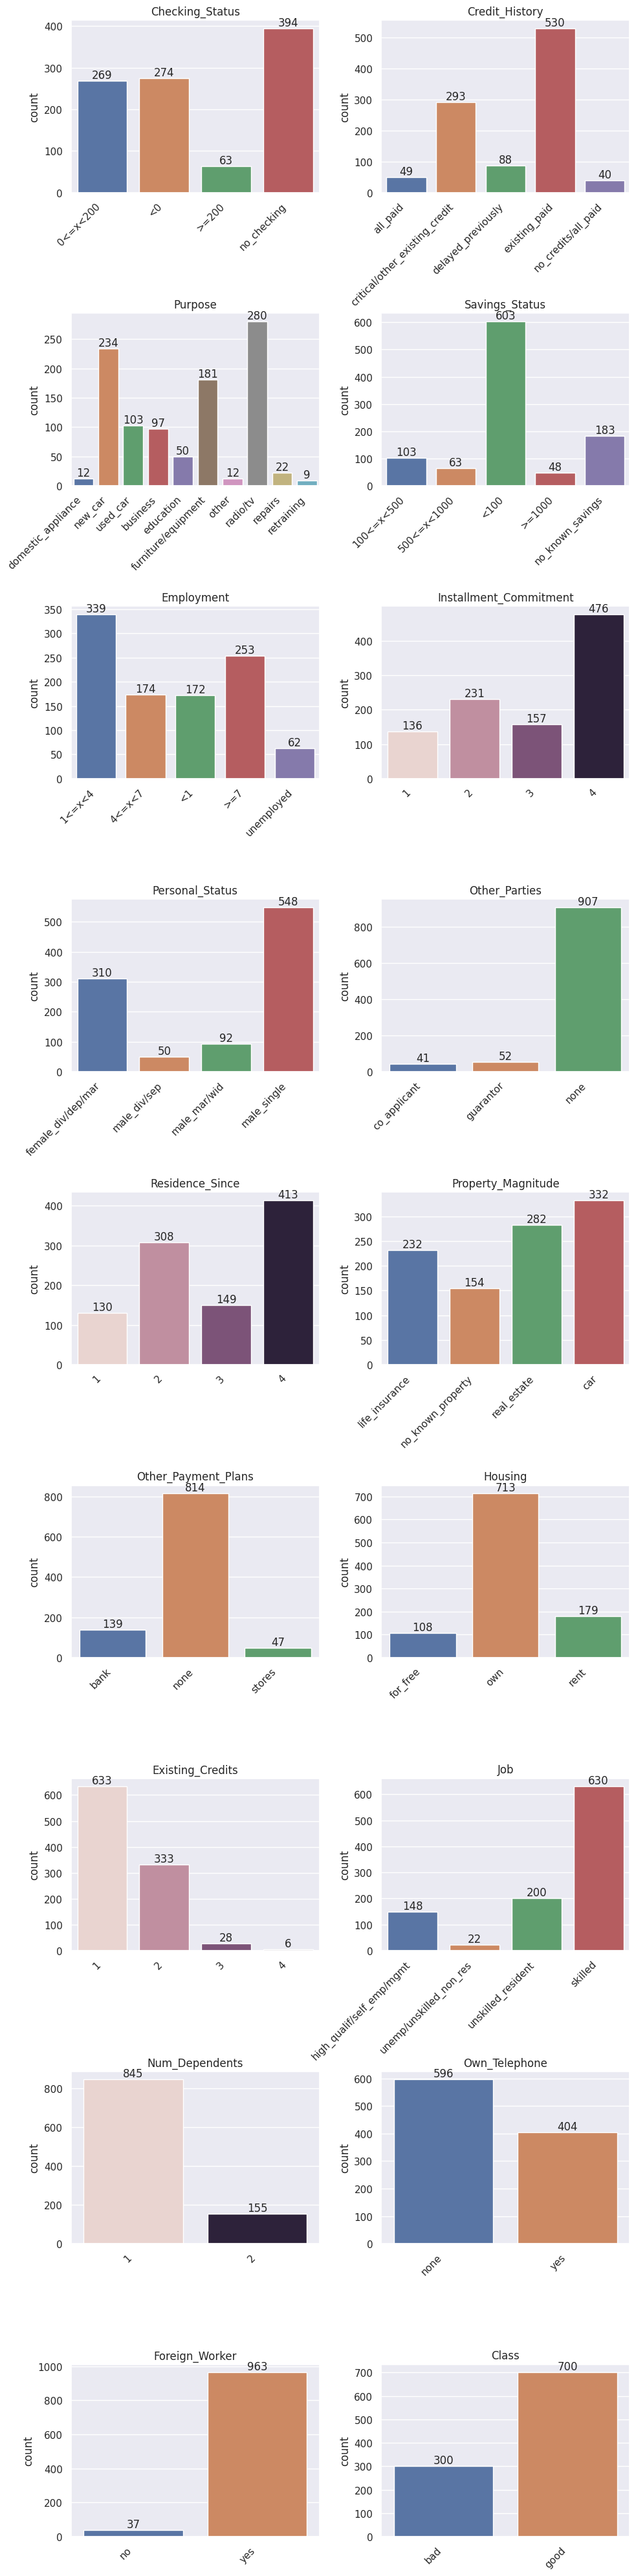

In [ ]:
count_fig = plt.figure(figsize=(10, 40))
for i in range(len(nonnum_features)):
  plt.subplot(int((len(nonnum_features)+1)/2), 2, i+1)
  barplot = sns.countplot(full_data, x=nonnum_features[i],hue=nonnum_features[i])
  for container in barplot.containers:
      barplot.bar_label(container)
  plt.xlabel('')
  plt.ylabel('count')
  plt.title(nonnum_features[i].title())
  plt.xticks(rotation=45,horizontalalignment='right')
  plt.tight_layout()
  if barplot.get_legend() is not None:
      barplot.get_legend().remove()
plt.subplots_adjust(hspace=0.7, wspace=0.25)

In [ ]:

### To avoide data leaking, dataset need to be split into train, test sets first
#from sklearn.model_selection import train_test_split
#
feature_data = full_data.drop('class', axis=1)
target_data = full_data['class']

#X_train, X_test, y_train, y_test = train_test_split(feature_data, target_data, test_size=0.2, random_state=42)

In [ ]:
#### Since there are discreted numerical features, we need to encode these features using OrdinalEncoding
#### Onehotencoding for all the rest of categorical features
#from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler, FunctionTransformer
#from sklearn.pipeline import Pipeline
#from sklearn.compose import ColumnTransformer
#from numpy import log1p, expm1
#
#log_transformer = FunctionTransformer(log1p,inverse_func=np.expm1)
#ordinal_encoder = OrdinalEncoder()
#one_hot_encoder = OneHotEncoder(handle_unknown='ignore')
#standarscaler = StandardScaler()
#
#### only numeric discrete data will be selected for OrdinalEncoder
#discrete_num = ['installment_commitment', 'residence_since', 'num_dependents', 'existing_credits']
## Extract the column names for categorical features
#categorical_cols = X_train.select_dtypes(exclude='number').columns.tolist()
#
##ordinal_encoder_pipeline = Pipeline([
##    ('ordinal_encoder', ordinal_encoder)
##])
##
##one_hot_pipeline = Pipeline([
##    ('one_hot_encoder', one_hot_encoder)
##])
#
#column_transform = ColumnTransformer([
#    ('discrete_num_ordinalencoder', ordinal_encoder, discrete_num),
#    ('categorical_onehot_encoder', one_hot_encoder, categorical_cols),
#    ('log_transform', log_transformer, con_num_features),
#    ('con_num_features', standarscaler, con_num_features)
#])
#
#encoded_X_train = column_transform.fit_transform(X_train)
#encoded_X_test = column_transform.transform(X_test)


In [ ]:
### linear gression model
#from sklearn.linear_model import LogisticRegression
#from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
#from sklearn.preprocessing import LabelEncoder
#
#label_encoder = LabelEncoder()
#y_train_encoded = label_encoder.fit_transform(y_train)
#y_test_encoded = label_encoder.transform(y_test)
#
#
#lg_reg = Pipeline([
#    ('column_transformation', column_transform),
#    ('logistic_regression', LogisticRegression())
#])
#
#lg_reg.fit(X_train, y_train_encoded)

In [ ]:
### predict values using the test set and calculate accuracy

#y_pred_encoded = lg_reg.predict(X_test)
#y_pred = label_encoder.inverse_transform(y_pred_encoded)
#
#acc = accuracy_score(y_test, y_pred)
#print(f"Accuracy: {acc}")

In [ ]:
### accuracy of the training process
#y_train_pred_encoded = lg_reg.predict(X_train)
#y_train_pred = label_encoder.inverse_transform(y_train_pred_encoded)
#
#acc_train = accuracy_score(y_train, y_train_pred)
#
#print(f"Accuracy: {acc_train}")

##### Use LazyPredict to do all kinds of support regression. Because LaziPredict is not supported to have fit() in Sklearn, all feature data must be encoded and transformed first


In [ ]:
### Three continous numeric features do not follow normal distribution, so we use log transform to make them have normal distribution

#from numpy import log1p, expm1
#from sklearn.preprocessing import FunctionTransformer, OneHotEncoder, OrdinalEncoder, LabelEncoder
#from sklearn.compose import ColumnTransformer
#from sklearn.pipeline import Pipeline
#from sklearn.model_selection import train_test_split
#
#
#log_transformer = FunctionTransformer(log1p,inverse_func=np.expm1)
#
#full_data[con_num_features] = log_transformer.fit_transform(full_data[con_num_features])

In [ ]:
#full_data.head()

In [ ]:
#fig_hist = plt.figure(figsize=(10, 10))
#for i in range(len(con_num_features)):
#  plt.subplot(int((len(con_num_features)+1)/2), 2, i+1)
#  sns.histplot(full_data, kde=True, bins=40, x=con_num_features[i], hue='class')
#  plt.xlabel('')
#  plt.ylabel(con_num_features[i].title())
#plt.tight_layout()
#plt.show()

In [ ]:
from sklearn.preprocessing import FunctionTransformer, OneHotEncoder, OrdinalEncoder, LabelEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from numpy import log1p, expm1

X_train, X_test, y_train, y_test = train_test_split(feature_data, target_data, test_size=0.2, random_state=42)

#### only numeric discrete data will be selected for OrdinalEncoder
discrete_num = ['installment_commitment', 'residence_since', 'num_dependents', 'existing_credits']
## Extract the column names for categorical features
categorical_cols = X_train.select_dtypes(exclude='number').columns.tolist()

log_transformer = FunctionTransformer(log1p,inverse_func=np.expm1)

log_scaler = Pipeline([
    ('log_transformer', log_transformer),
    ('standard_scaler', StandardScaler())
])

columns_transformer = ColumnTransformer([
                ('discrete_ordinal_encoder', OrdinalEncoder(), discrete_num),
                ('categorical_onehot_encoder', OneHotEncoder(handle_unknown='ignore'), categorical_cols), #OneHotEncoder seems to be better after LazyClassification
                #('categorical_ordinal_encoderr', OrdinalEncoder(), categorical_cols),
                ('log_scaler', log_transformer, con_num_features)],
                remainder='passthrough'
                                        )

label_encoder = LabelEncoder()

X_train_encoded = columns_transformer.fit_transform(X_train)
X_test_encoded = columns_transformer.fit_transform(X_test)
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.fit_transform(y_test)


In [ ]:
X_train_encoded

array([[2.        , 3.        , 0.        , ..., 4.11087386, 8.83010432,
        4.15888308],
       [1.        , 0.        , 0.        , ..., 3.09104245, 7.74932246,
        3.52636052],
       [1.        , 3.        , 0.        , ..., 1.94591015, 7.12044437,
        3.93182563],
       ...,
       [3.        , 1.        , 0.        , ..., 3.21887582, 8.66647489,
        3.33220451],
       [1.        , 0.        , 0.        , ..., 2.56494936, 7.30317005,
        3.25809654],
       [2.        , 1.        , 0.        , ..., 1.94591015, 6.8384052 ,
        3.21887582]])

In [ ]:
!pip install lazypredict
from lazypredict.Supervised import LazyClassifier

clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)

## lazyclassifier does not accept scipy sparse matrices generated from encoder. We need to transform them back to array and then to pandas DataFrame.

#X_train_df = pd.DataFrame(X_train_encoded.toarray(), columns=columns_transformer.get_feature_names_out())
#X_test_df = pd.DataFrame(X_test_encoded.toarray(), columns=columns_transformer.get_feature_names_out())


models, predictions = clf.fit(X_train_encoded, X_test_encoded, y_train_encoded, y_test_encoded)



100%|██████████| 32/32 [00:02<00:00, 15.57it/s]

[LightGBM] [Info] Number of positive: 559, number of negative: 241
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000724 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 495
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 56
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.698750 -> initscore=0.841353
[LightGBM] [Info] Start training from score 0.841353
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

In [ ]:
models.sort_values('F1 Score', ascending=False)

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
RidgeClassifierCV,0.81,0.75,0.75,0.81,0.04
RidgeClassifier,0.81,0.75,0.75,0.81,0.02
LinearSVC,0.81,0.74,0.74,0.80,0.04
XGBClassifier,0.80,0.73,0.73,0.79,0.11
NuSVC,0.80,0.73,0.73,0.79,0.10
LinearDiscriminantAnalysis,0.80,0.73,0.73,0.79,0.04
LGBMClassifier,0.80,0.73,0.73,0.79,0.11
LogisticRegression,0.80,0.73,0.73,0.79,0.04
CalibratedClassifierCV,0.80,0.69,0.69,0.78,0.09


*  From the data above, we can see that all ML classifiers are not really good due to their not high accuracy and balance accuracy.
* Futher feature enginneering processes need to be done
* The next step is to select only top features to test models to see if the accuracy of models is improved
* There are several kinds of experiments that can be used to select top features
  - Encode categorical feature using ordinal encoding to select n best features
  - one hot encode the rest of categorical features



In [ ]:
### using SelectKbest to select n best features
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.base import BaseEstimator, TransformerMixin
from numpy import log1p, expm1

class customizedFunctionTransformer(BaseEstimator, TransformerMixin):
  """
  Customize the FucntionTransformer to support get_feature_names_out()
  """
  def __init__(self, func, inverse_func=None, feature_names=None):
    self.func = func
    self.inverse_func= inverse_func
    self.feature_names = feature_names
  def fit(self, X, y=None):
    return self
  def transform(self, X):
    if self.inverse_func is not None:
      return self.inverse_func(self.func(X))
    return self.func(X)

  def get_feature_names_out(self, input_features=None):
    if self.feature_names is not None:
      return self.feature_names
    return input_features

log_transformer = customizedFunctionTransformer(log1p, expm1, [col for col in con_num_features])

columns_transformer_for_kbest = ColumnTransformer([
                ('discrete_ordinal_encoder', OrdinalEncoder(), discrete_num),
                ('categorical_ordinal_encoder', OrdinalEncoder(), categorical_cols),
                ('log', log_transformer, con_num_features),
                #('standard_scaler', StandardScaler(), con_num_features)
                ],
                verbose_feature_names_out =True
                                                  )


feature_data_encoded = columns_transformer_for_kbest.fit_transform(feature_data)
target_data_encoded = label_encoder.fit_transform(target_data)


selector = SelectKBest(score_func=chi2, k=10)
feature_data_kbest = selector.fit_transform(feature_data_encoded, target_data_encoded)



In [ ]:
selector.scores_


array([3.32201385e+00, 5.80720093e-03, 7.68049155e-03, 1.71299871e+00,
       9.07138643e+01, 4.80115453e+00, 2.49248545e+01, 6.11888112e+00,
       9.44574551e-02, 7.78224048e+00, 8.58469862e-02, 3.25925926e+00,
       5.67233061e-01, 9.82170646e-02, 7.53681692e-01, 7.92550684e-01,
       2.49270632e-01, 3.21030795e+02, 5.82624900e+04, 3.02003092e+01])

In [ ]:
columns_transformer_for_kbest.get_feature_names_out()

array(['discrete_ordinal_encoder__installment_commitment',
       'discrete_ordinal_encoder__residence_since',
       'discrete_ordinal_encoder__num_dependents',
       'discrete_ordinal_encoder__existing_credits',
       'categorical_ordinal_encoder__checking_status',
       'categorical_ordinal_encoder__credit_history',
       'categorical_ordinal_encoder__purpose',
       'categorical_ordinal_encoder__savings_status',
       'categorical_ordinal_encoder__employment',
       'categorical_ordinal_encoder__personal_status',
       'categorical_ordinal_encoder__other_parties',
       'categorical_ordinal_encoder__property_magnitude',
       'categorical_ordinal_encoder__other_payment_plans',
       'categorical_ordinal_encoder__housing',
       'categorical_ordinal_encoder__job',
       'categorical_ordinal_encoder__own_telephone',
       'categorical_ordinal_encoder__foreign_worker', 'log__duration',
       'log__credit_amount', 'log__age'], dtype=object)

In [ ]:
selector.get_support()

array([ True, False, False, False,  True,  True,  True,  True, False,
        True, False,  True, False, False, False, False, False,  True,
        True,  True])

In [ ]:
columns_transformer_for_kbest.get_feature_names_out()[selector.get_support()]

array(['discrete_ordinal_encoder__installment_commitment',
       'categorical_ordinal_encoder__checking_status',
       'categorical_ordinal_encoder__credit_history',
       'categorical_ordinal_encoder__purpose',
       'categorical_ordinal_encoder__savings_status',
       'categorical_ordinal_encoder__personal_status',
       'categorical_ordinal_encoder__property_magnitude', 'log__duration',
       'log__credit_amount', 'log__age'], dtype=object)

In [ ]:
selector.scores_[selector.get_support()]

array([3.32201385e+00, 9.07138643e+01, 4.80115453e+00, 2.49248545e+01,
       6.11888112e+00, 7.78224048e+00, 3.25925926e+00, 3.21030795e+02,
       5.82624900e+04, 3.02003092e+01])

In [ ]:
### Now we have some 10 best features after applying selectKBest, and we also know names of the features selected

best_features = columns_transformer_for_kbest.get_feature_names_out()[selector.get_support()]

## get the original feature names which were selected
selected_features = [feature.split('__')[-1] for feature in best_features]
selected_features


['installment_commitment',
 'checking_status',
 'credit_history',
 'purpose',
 'savings_status',
 'personal_status',
 'property_magnitude',
 'duration',
 'credit_amount',
 'age']

In [ ]:
### selected data
selected_feature_data = feature_data[selected_features]
selected_feature_data.select_dtypes(include='number').columns

Index(['installment_commitment', 'duration', 'credit_amount', 'age'], dtype='object')

In [ ]:
discrete_num = [feature.split('__')[-1] for feature in best_features if feature.split('__')[0].split('_')[0] == 'discrete']
discrete_num

['installment_commitment']

In [ ]:
con_num_features = [col for col in selected_feature_data.select_dtypes(include='number').columns if col not in discrete_num]
con_num_features

['duration', 'credit_amount', 'age']

In [ ]:
from sklearn.preprocessing import FunctionTransformer, OneHotEncoder, OrdinalEncoder, LabelEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from numpy import log1p, expm1

X_train, X_test, y_train, y_test = train_test_split(selected_feature_data, target_data, test_size=0.2, random_state=42)

#### only numeric discrete data will be selected for OrdinalEncoder
discrete_num = [feature.split('__')[-1] for feature in best_features if feature.split('__')[0].split('_')[0] == 'discrete']
con_num_features = [col for col in selected_feature_data.select_dtypes(include='number').columns if col not in discrete_num]
## Extract the column names for categorical features
categorical_cols = X_train.select_dtypes(exclude='number').columns.tolist()

log_transformer = customizedFunctionTransformer(log1p,inverse_func=np.expm1)

log_scaler = Pipeline([
    ('log_transformer', log_transformer),
    ('standard_scaler', StandardScaler())
])

columns_transformer = ColumnTransformer([
                ('discrete_ordinal_encoder', OrdinalEncoder(), discrete_num),
                #('categorical_onehot_encoder', OneHotEncoder(handle_unknown='ignore',sparse_output=False), categorical_cols),
                ('categorical_ordinal_encoder', OrdinalEncoder(), categorical_cols),
                ('log_scaler', log_scaler, con_num_features)],
                remainder=StandardScaler(),
                verbose_feature_names_out=True)

label_encoder = LabelEncoder()

X_train_encoded = columns_transformer.fit_transform(X_train)
X_test_encoded = columns_transformer.transform(X_test)
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.fit_transform(y_test)


## Get feature names after transformation
#feature_names_out = columns_transformer.get_feature_names_out()
#
## Convert sparse matrix to dense and then to DataFrame
#X_train_encoded = pd.DataFrame(X_train_encoded.toarray(), columns=feature_names_out, index=X_train.index)
#X_test_encoded = pd.DataFrame(X_test_encoded.toarray(), columns=feature_names_out, index=X_test.index)


In [ ]:
X_train_encoded

array([[ 2.        ,  1.        ,  2.        , ...,  3.29708155,
         1.19991221,  2.4061873 ],
       [ 1.        ,  2.        ,  1.        , ..., -0.00805096,
        -0.35962991, -0.22436411],
       [ 1.        ,  3.        ,  3.        , ..., -1.27925578,
        -0.73354714,  1.26628169],
       ...,
       [ 3.        ,  3.        ,  1.        , ...,  0.24619   ,
         0.84360327, -0.7504744 ],
       [ 1.        ,  0.        ,  3.        , ..., -0.77077385,
        -0.64792251, -0.92584449],
       [ 2.        ,  3.        ,  2.        , ..., -1.27925578,
        -0.83850636, -1.01352954]])

In [ ]:
### use lazyClassifier to see if new dataset can improve the quality of models

clf_kbest = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)

models_kbest, predictions_kbest =  clf_kbest.fit(X_train_encoded, X_test_encoded, y_train_encoded, y_test_encoded)



 97%|█████████▋| 31/32 [00:02<00:00, 13.25it/s]

[LightGBM] [Info] Number of positive: 559, number of negative: 241
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000070 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 373
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.698750 -> initscore=0.841353
[LightGBM] [Info] Start training from score 0.841353
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

100%|██████████| 32/32 [00:02<00:00, 11.31it/s]


In [ ]:
models_kbest.sort_values('F1 Score', ascending=False)

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
XGBClassifier,0.81,0.74,0.74,0.80,0.17
RandomForestClassifier,0.81,0.73,0.73,0.80,0.51
LGBMClassifier,0.80,0.73,0.73,0.79,0.23
NuSVC,0.80,0.71,0.71,0.78,0.09
ExtraTreesClassifier,0.78,0.69,0.69,0.76,0.50
AdaBoostClassifier,0.78,0.67,0.67,0.76,0.16
SVC,0.78,0.65,0.65,0.74,0.08
BaggingClassifier,0.73,0.69,0.69,0.73,0.06
KNeighborsClassifier,0.73,0.66,0.66,0.73,0.10


* We will select some top models with high values of F1 to retrain and tune hyperparameters
* Selection of best features does not improve qualily of models, so all features will be used for fitting models

In [ ]:
### LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV

lg_reg = LogisticRegression(class_weight='balanced')

lg_reg_params = {
    'penalty': ['l1', 'l2', 'elasticnet', None],
    'C': [0.001, 0.005, 0.01, 0.02, 0.05, 0.07, 0.1, 0.5, 1, 2, 5, 10 ],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'saga'],
    'class_weight': [None, 'balanced']
}

scoring = ['accuracy', 'precision', 'recall', 'f1', 'balanced_accuracy']

lg_grid_search = GridSearchCV(lg_reg, lg_reg_params, cv=10, scoring=scoring, refit='balanced_accuracy', n_jobs=-1)

lg_grid_search.fit(X_train_encoded, y_train_encoded)





GridSearchCV(cv=10, estimator=LogisticRegression(class_weight='balanced'),
             n_jobs=-1,
             param_grid={'C': [0.001, 0.005, 0.01, 0.02, 0.05, 0.07, 0.1, 0.5,
                               1, 2, 5, 10],
                         'class_weight': [None, 'balanced'],
                         'penalty': ['l1', 'l2', 'elasticnet', None],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'saga']},
             refit='balanced_accuracy',
             scoring=['accuracy', 'precision', 'recall', 'f1',
                      'balanced_accuracy'])

In [ ]:
best_lg_model = lg_grid_search.best_estimator_
best_params = lg_grid_search.best_params_
best_score = lg_grid_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best Score: {best_score}")

model_dir='/content/drive/MyDrive/creditcard-risk'
os.makedirs(model_dir, exist_ok=True)
joblib.dump(best_lg_model, model_dir + '/logisticRegression_model.pkl')



Best Parameters: {'C': 0.07, 'class_weight': 'balanced', 'penalty': 'l1', 'solver': 'saga'}
Best Score: 0.685280303030303


['/content/drive/MyDrive/creditcard-risk/logisticRegression_model.pkl']

In [ ]:
lg_grid_search.cv_results_

{'mean_fit_time': array([0.00098822, 0.00276453, 0.00615702, 0.0066906 , 0.00707719,
        0.00787649, 0.00368769, 0.01605341, 0.00125837, 0.00125794,
        0.00107021, 0.00102639, 0.01626956, 0.01652794, 0.00057607,
        0.01819029, 0.000507  , 0.0006098 , 0.00340531, 0.00587254,
        0.01211627, 0.007445  , 0.00521331, 0.01645164, 0.00048599,
        0.00051856, 0.00048642, 0.00052173, 0.01015954, 0.02311978,
        0.00051124, 0.03322153, 0.00129805, 0.00113752, 0.0053551 ,
        0.00969193, 0.01477876, 0.026406  , 0.00879683, 0.01768916,
        0.000594  , 0.00139782, 0.00056233, 0.00104446, 0.02044005,
        0.02383177, 0.00056629, 0.02289481, 0.00107043, 0.00342298,
        0.00271943, 0.01179235, 0.01591587, 0.01661241, 0.01138003,
        0.04301391, 0.00054436, 0.00075037, 0.00118182, 0.00166054,
        0.01795022, 0.02631438, 0.00160537, 0.0484329 , 0.00047803,
        0.00292263, 0.00312324, 0.03541825, 0.0155951 , 0.01642549,
        0.00681205, 0.01935666,

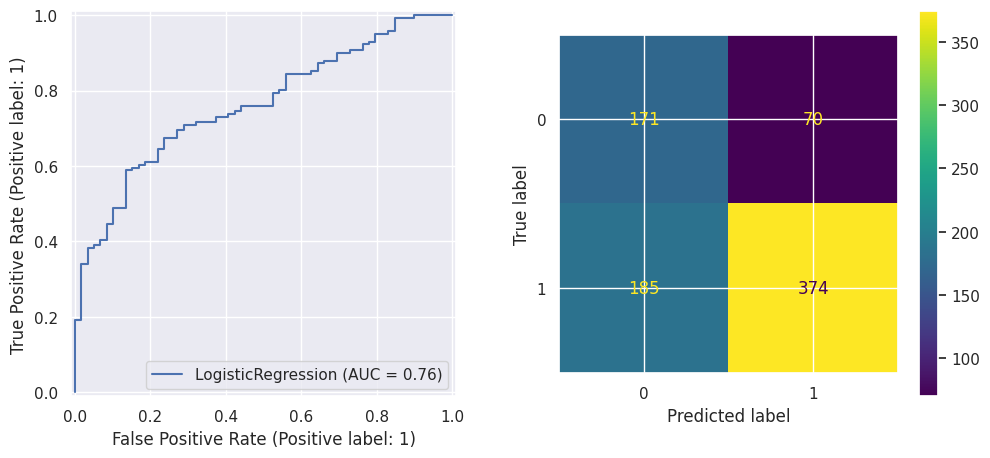

In [ ]:
### plot ROC and AUC to check the performance of models
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay

#fpt_lg, tpr_lg, thresholds_lg = roc_curve(y_train_encoded, best_lg_model.predict_proba(X_train_encoded)[:, 1])


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
roc_curve_plot = RocCurveDisplay.from_estimator(best_lg_model, X_test_encoded, y_test_encoded, ax=ax1)

confused_curve = ConfusionMatrixDisplay.from_estimator(best_lg_model, X_train_encoded, y_train_encoded,ax=ax2)


In [ ]:
#### calculate y_scores to calculate roc auc score and plot precision recall curve
from sklearn.metrics import precision_recall_curve, roc_auc_score, roc_curve, auc

y_scores_lg = best_lg_model.predict_proba(X_test_encoded)[:,1]

auc_score_lg = roc_auc_score(y_test_encoded, y_scores_lg)
print(f"AUC Score: {auc_score_lg}")



AUC Score: 0.7609087630724846


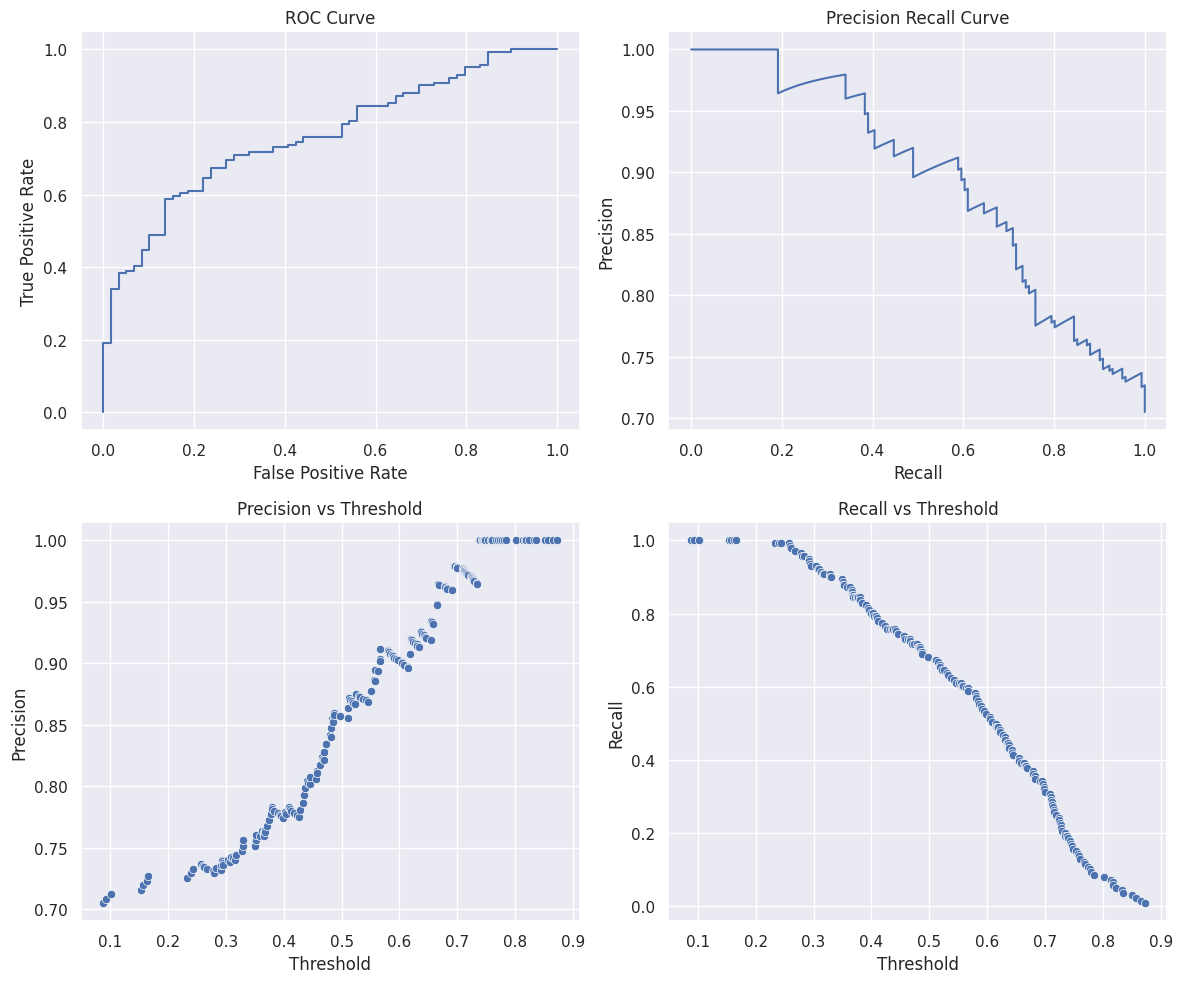

In [ ]:
### plot precision recall curge
fpr_lg, tpr_lg, thresholds_lg_roc = roc_curve(y_test_encoded, y_scores_lg, pos_label=1)

precision_lg, recall_lg, thresholds_lg_auc = precision_recall_curve(y_test_encoded, y_scores_lg)

fig = plt.figure(figsize=(12, 10))

plt.subplot(2,2,1)
plt.plot(fpr_lg, tpr_lg)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

plt.subplot(2,2,2)
plt.plot(recall_lg, precision_lg)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve')

plt.subplot(2,2,3)
sns.scatterplot(x=thresholds_lg_auc,y=precision_lg[:-1])
plt.xlabel('Threshold')
plt.ylabel('Precision')
plt.title('Precision vs Threshold')

plt.subplot(2,2,4)
sns.scatterplot(x=thresholds_lg_auc,y=recall_lg[:-1])
plt.xlabel('Threshold')
plt.ylabel('Recall')
plt.title('Recall vs Threshold')

plt.tight_layout()



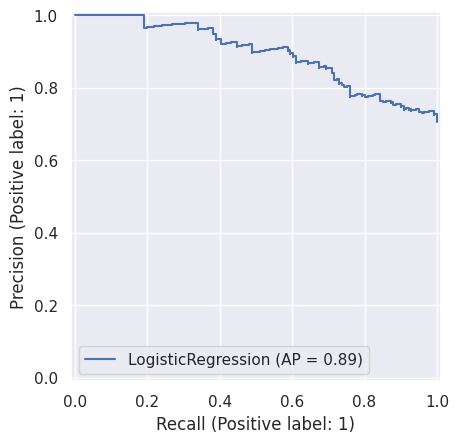

In [ ]:
### plot Precision Recall using PreicisionRecallDisplay
from sklearn.metrics import PrecisionRecallDisplay

precision_recall_lg_plot = PrecisionRecallDisplay.from_estimator(best_lg_model, X_test_encoded, y_test_encoded)

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

y_pred_encoded_lg = best_lg_model.predict(X_test_encoded)

precision_score_lg = precision_score(y_test_encoded, y_pred_encoded_lg)
recall_score_lg = recall_score(y_test_encoded, y_pred_encoded_lg)
f1_score_lg = f1_score(y_test_encoded, y_pred_encoded_lg)
accuracy_score_lg = accuracy_score(y_test_encoded, y_pred_encoded_lg)

print(f"Precision Score: {precision_score_lg}")
print(f"Recall Score: {recall_score_lg}")
print(f"F1 Score: {f1_score_lg}")
print(f"Accuracy Score: {accuracy_score_lg}")

Precision Score: 0.8558558558558559
Recall Score: 0.6737588652482269
F1 Score: 0.753968253968254
Accuracy Score: 0.69


In [ ]:
from sklearn.metrics import classification_report

lg_report = classification_report(y_test_encoded, y_pred_encoded_lg)
print(lg_report)

              precision    recall  f1-score   support

           0       0.48      0.73      0.58        59
           1       0.86      0.67      0.75       141

    accuracy                           0.69       200
   macro avg       0.67      0.70      0.67       200
weighted avg       0.75      0.69      0.70       200



In [ ]:
### Construct model using RidgeClassififierCV
from sklearn.linear_model import RidgeClassifierCV

ridge_clfCV = RidgeClassifierCV(alphas=(0.05, 0.1, 0.2, 0.5, 1.0, 2, 5.0, 10, 20, 30))

ridge_clfCV.fit(X_train_encoded, y_train_encoded)



RidgeClassifierCV(alphas=(0.05, 0.1, 0.2, 0.5, 1.0, 2, 5.0, 10, 20, 30))

In [ ]:
joblib.dump(ridge_clfCV, model_dir + '/ridgeClassificationCV_model.pkl')

['/content/drive/MyDrive/creditcard-risk/ridgeClassificationCV_model.pkl']

In [ ]:
from sklearn.metrics import balanced_accuracy_score

y_pred_encoded_ridge = ridge_clfCV.predict(X_test_encoded)

accuracy_score_ridge = accuracy_score(y_test_encoded, y_pred_encoded_ridge)
print(f"Accuracy Score: {accuracy_score_ridge}")

precision_score_ridge = precision_score(y_test_encoded, y_pred_encoded_ridge)
print(f"Precision Score: {precision_score_ridge}")

recal_score_ridge = recall_score(y_test_encoded, y_pred_encoded_ridge)
print(f"Recall Score: {recal_score_ridge}")

f1_score_ridge = f1_score(y_test_encoded, y_pred_encoded_ridge)
print(f"F1 Score: {f1_score_ridge}")

balanced_accuracy_score_ridge = balanced_accuracy_score(y_test_encoded, y_pred_encoded_ridge)
print(f"Balanced Accuracy Score: {balanced_accuracy_score_ridge}")

Accuracy Score: 0.74
Precision Score: 0.751412429378531
Recall Score: 0.9432624113475178
F1 Score: 0.8364779874213837
Balanced Accuracy Score: 0.5987498497415555


Text(0.5, 1.0, 'Confusion Matrix')

<Figure size 1200x1000 with 0 Axes>

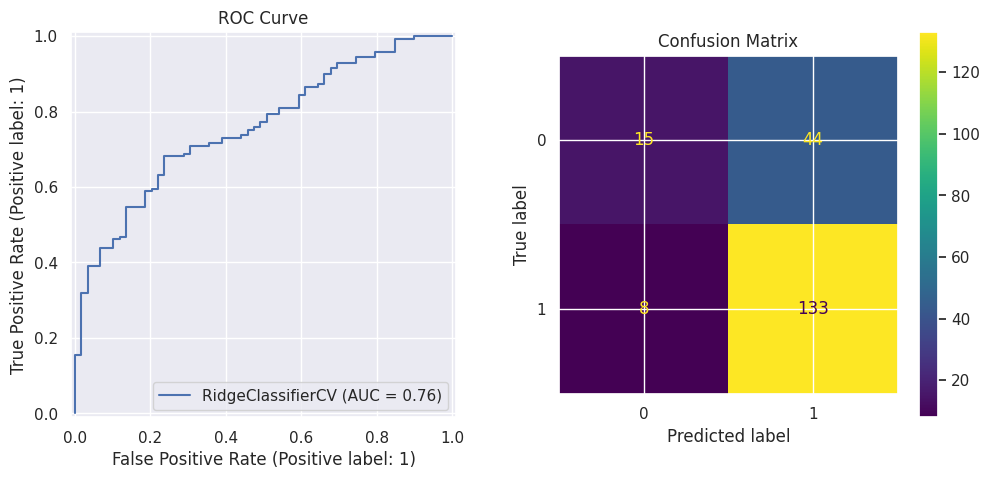

In [ ]:
### plot roc_curve and confusion matrix using RocCurveDisplay and ConfusionMatrixDisplay

ridge_clfCV_plot = plt.figure(figsize=(12, 10))
fig_ridge, (ax1_ridge, ax2_ridge) = plt.subplots(1, 2, figsize=(12, 5))
roc_curve_plot_ridge = RocCurveDisplay.from_estimator(ridge_clfCV, X_test_encoded, y_test_encoded,ax=ax1_ridge)
ax1_ridge.set_title('ROC Curve')
confused_curve_ridge = ConfusionMatrixDisplay.from_estimator(ridge_clfCV, X_test_encoded, y_test_encoded,ax=ax2_ridge)
ax2_ridge.set_title('Confusion Matrix')


AUC Score: 0.7587450414713307


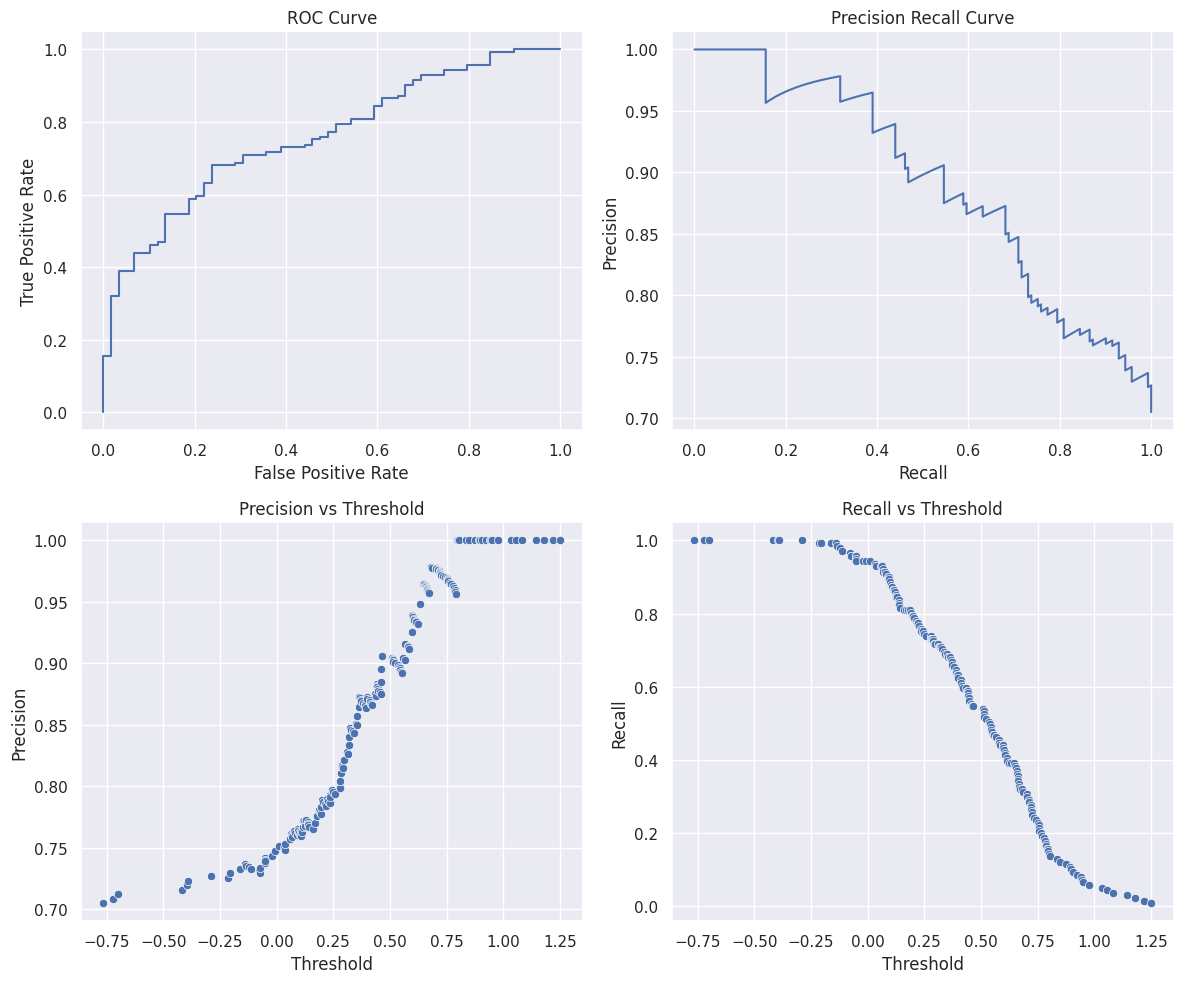

In [ ]:
### Plot precision vs recall, precision vs threshold, recall vs threshold, and ROC curve

y_scores_ridge = ridge_clfCV.decision_function(X_test_encoded)

auc_score_ridge = roc_auc_score(y_test_encoded, y_scores_ridge)
print(f"AUC Score: {auc_score_ridge}")

fpr_ridge, tpr_ridge, threshold_ridge_roc = roc_curve(y_test_encoded, y_scores_ridge, pos_label=1)

precision_ridge, recall_ridge, threshold_ridge = precision_recall_curve(y_test_encoded, y_scores_ridge)

fig_ridge = plt.figure(figsize=(12, 10))

plt.subplot(2,2,1)
plt.plot(fpr_ridge, tpr_ridge)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

plt.subplot(2,2,2)
plt.plot(recall_ridge, precision_ridge)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve')

plt.subplot(2,2,3)
sns.scatterplot(x=threshold_ridge,y=precision_ridge[:-1])
plt.xlabel('Threshold')
plt.ylabel('Precision')
plt.title('Precision vs Threshold')

plt.subplot(2,2,4)
sns.scatterplot(x=threshold_ridge,y=recall_ridge[:-1])
plt.xlabel('Threshold')
plt.ylabel('Recall')
plt.title('Recall vs Threshold')

plt.tight_layout()

In [ ]:
### f1_scores report

ridge_report = classification_report(y_test_encoded, y_pred_encoded_ridge)
print(ridge_report)

              precision    recall  f1-score   support

           0       0.65      0.25      0.37        59
           1       0.75      0.94      0.84       141

    accuracy                           0.74       200
   macro avg       0.70      0.60      0.60       200
weighted avg       0.72      0.74      0.70       200



It seems that the model is not that excellent since it cannot classifiy low-risk customers. It is good for detection of high-risk ones. We might lose potential customers


In [ ]:
### build a model using RandomForestRegression classification
!pip install scikit-learn-intelex
from sklearnex import patch_sklearn
patch_sklearn()

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

rf_clf = RandomForestClassifier(warm_start=True)

rf_clf_params = {
        'n_estimators': [100, 200, 300],
        'criterion': ['gini', 'entropy', 'log_loss'],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'bootstrap': [True],
        'class_weight': [None, 'balanced', 'balanced_subsample']
}

scoring = ['accuracy', 'precision', 'recall', 'f1']

rf_grid_search = RandomizedSearchCV(rf_clf, rf_clf_params,
                                    n_iter=100, cv=10,
                                    scoring=scoring,
                                    refit='f1',
                                    n_jobs=-1,
                                    random_state=42)

rf_grid_search.fit(X_train_encoded, y_train_encoded)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 55.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.4/91.4 MB 6.7 MB/s eta 0:00:00


Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(warm_start=True),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True],
                                        'class_weight': [None, 'balanced',
                                                         'balanced_subsample'],
                                        'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [None, 10, 20, 30],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300]},
                   random_state=42, refit='f1',
                   scoring=['accuracy', 'precision', 'recall', 'f1'])

In [ ]:
rf_grid_best_model = rf_grid_search.best_estimator_

rf_grid_best_params = rf_grid_search.best_params_
print(f"Best parameters: {rf_grid_best_params}")

rf_grid_best_score = rf_grid_search.best_score_
print(f"Best score: {rf_grid_best_score}")

Best parameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 30, 'criterion': 'entropy', 'class_weight': None, 'bootstrap': True}
Best score: 0.8395123077377062


In [ ]:
joblib.dump(rf_grid_best_model, model_dir + '/randomForest_model.pkl')

['/content/drive/MyDrive/creditcard-risk/randomForest_model.pkl']

In [ ]:
y_pred_encode_rf = rf_grid_best_model.predict(X_test_encoded)

accuracy_score_rf = accuracy_score(y_test_encoded, y_pred_encode_rf)
print(f"Accuracy Score: {accuracy_score_rf}")

precision_score_rf = precision_score(y_test_encoded, y_pred_encode_rf)
print(f"Precision Score: {precision_score_rf}")

recall_score_rf = recall_score(y_test_encoded, y_pred_encode_rf)
print(f"Recall Score: {recall_score_rf}")

f1_score_rf = f1_score(y_test_encoded, y_pred_encode_rf)
print(f"F1 Score: {f1_score_rf}")

balanced_accuracy_score_rf = balanced_accuracy_score(y_test_encoded, y_pred_encode_rf)
print(f"Balanced Accuracy Score: {balanced_accuracy_score_rf}")


rf_report = classification_report(y_test_encoded, y_pred_encode_rf)
print(rf_report)


Accuracy Score: 0.805
Precision Score: 0.8148148148148148
Recall Score: 0.9361702127659575
F1 Score: 0.8712871287128713
Balanced Accuracy Score: 0.7138478182473855
              precision    recall  f1-score   support

           0       0.76      0.49      0.60        59
           1       0.81      0.94      0.87       141

    accuracy                           0.81       200
   macro avg       0.79      0.71      0.73       200
weighted avg       0.80      0.81      0.79       200



Text(0.5, 1.0, 'Confusion Matrix')

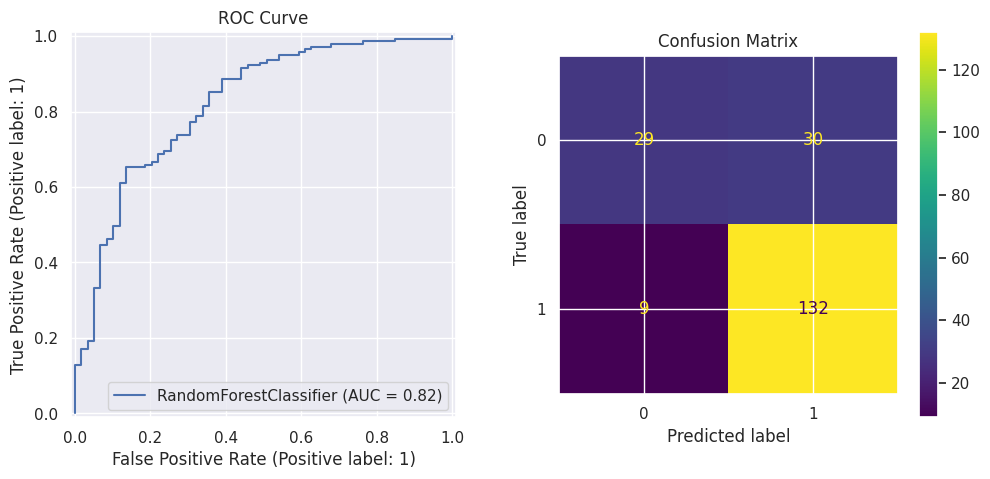

In [ ]:
### plot roc curve, confusion matrix using RocCurveDisplay and ConfusionMatrixDisplay functions of Sklearn

fig_rf, (ax1_rf, ax2_rf) = plt.subplots(1, 2, figsize=(12, 5))
roc_curve_plot_rf = RocCurveDisplay.from_estimator(rf_grid_best_model, X_test_encoded, y_test_encoded,ax=ax1_rf)
ax1_rf.set_title('ROC Curve')
confused_curve_rf = ConfusionMatrixDisplay.from_estimator(rf_grid_best_model, X_test_encoded, y_test_encoded,ax=ax2_rf)
ax2_rf.set_title('Confusion Matrix')


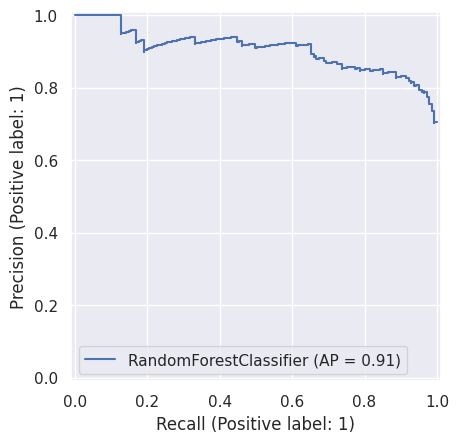

In [ ]:
### plot precision recall vs threshold

from sklearn.metrics import PrecisionRecallDisplay

precision_recall_curve_plot_rf = PrecisionRecallDisplay.from_estimator(rf_grid_best_model, X_test_encoded, y_test_encoded)



Text(0.5, 1.0, 'Precision/Recall vs Threshold')

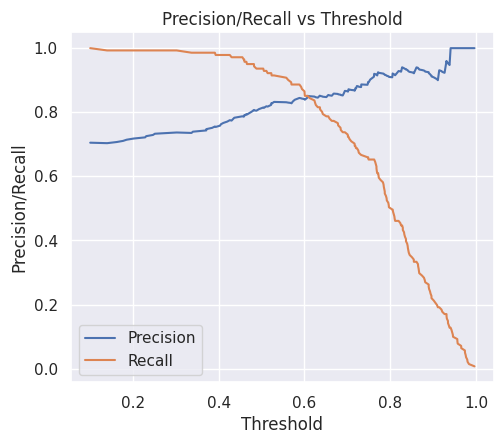

In [ ]:
y_scores_rf = rf_grid_best_model.predict_proba(X_test_encoded)[:,1]

precision_rf, recall_rf, threshold_rf = precision_recall_curve(y_test_encoded, y_scores_rf)

fig_precision_recall_rf = plt.figure(figsize=(12, 10))

plt.subplot(2,2,1)
sns.lineplot(x=threshold_rf, y=precision_rf[:-1], label='Precision')
sns.lineplot(x=threshold_rf, y=recall_rf[:-1], label='Recall')
plt.legend()
plt.xlabel('Threshold')
plt.ylabel('Precision/Recall')
plt.title('Precision/Recall vs Threshold')


In [ ]:
### try to use HalvingGridSearchCV

from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV

scoring_halving = 'f1'

rf_clf_halving_grid_search = HalvingGridSearchCV(
    rf_clf, rf_clf_params,
    cv=10, factor=3,
    scoring=scoring_halving,
    refit='f1',
    n_jobs=-1,
    random_state=42)

rf_clf_halving_grid_search.fit(X_train_encoded, y_train_encoded)

In [ ]:
#### Try XGBClassifier to see if the model can be improve
from xgboost import XGBClassifier

xgb_clf = XGBClassifier()

xgb_clf_params = {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7],
        'subsample': [0.8, 0.9, 1.0],
        'colsample_bytree': [0.8, 0.9, 1.0],
        'gamma': [0, 0.1, 0.2],
        'reg_alpha': [0, 0.1, 0.5],
        'reg_lambda': [0, 0.1, 0.5]
}

xgb_clf_randomizedSearch = RandomizedSearchCV(xgb_clf,
                                              param_distributions=xgb_clf_params,
                                              n_iter=100,
                                              cv=10,
                                              refit=True,
                                              random_state=42,
                                              n_jobs=-1
                                              )

xgb_clf_randomizedSearch.fit(X_train_encoded, y_train_encoded)



RandomizedSearchCV(cv=10,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rat...
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.8, 0.9, 1.0],
                                        'gamma': [0, 0.1, 0.2],
                                        'learning_rate': [0.01, 0.1, 0.2],
                                        'max_depth': [3, 5, 7],
                                        'n_estimators': [100, 200, 300],
                                        'reg_alpha': [0, 0.1, 0.5],
                                        'reg_lambda': [0, 0.1, 0.5],
                                        'subsample': [0.8, 0.9, 1.0]},
                   random_state=42)

In [ ]:
xgb_clf_randomizedSearch.best_params_, xgb_clf_randomizedSearch.best_score_

({'subsample': 0.8,
  'reg_lambda': 0.1,
  'reg_alpha': 0,
  'n_estimators': 100,
  'max_depth': 3,
  'learning_rate': 0.1,
  'gamma': 0.1,
  'colsample_bytree': 0.9},
 0.75625)

In [ ]:
xgb_clf_best_model = xgb_clf_randomizedSearch.best_estimator_

joblib.dump(xgb_clf_best_model, model_dir + '/xgboost_model.pkl')

['/content/drive/MyDrive/creditcard-risk/xgboost_model.pkl']

In [ ]:
y_pred_encode_xgb = xgb_clf_best_model.predict(X_test_encoded)

xgb_report = classification_report(y_test_encoded, y_pred_encode_xgb)
print(xgb_report)

              precision    recall  f1-score   support

           0       0.74      0.47      0.58        59
           1       0.81      0.93      0.86       141

    accuracy                           0.80       200
   macro avg       0.77      0.70      0.72       200
weighted avg       0.79      0.80      0.78       200



- So far, we can see that RandomForestRegression can give a better model in comparision to other methods.
- We will try to use neutral nextwork logisitic method to construct a model and will see if it can give a better model

In [ ]:
import tensorflow as tf
(x_train, y_train), _ = tf.keras.datasets.cifar10.load_data()
x_train = x_train.reshape((len(x_train), -1))
input_shape = x_train.shape[1:]
input_shape

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


(3072,)

In [ ]:
import tensorflow as tf
import numpy as np
from sklearn.datasets import fetch_openml
from tensorflow.keras.layers import Dense, Input, Embedding, Flatten, Concatenate, Normalization, IntegerLookup, StringLookup
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Load dataset (assuming credit-g as an example; replace with your huge dataset)
credit_data = fetch_openml(name='credit-g', version=1, as_frame=True)
X = credit_data.data
y = credit_data.target.map({'good': 1, 'bad': 0}).values  # Binary target as numpy array

# Define feature columns (based on credit-g and your code)
discrete_num = ['installment_commitment', 'residence_since', 'num_dependents', 'existing_credits']
categorical_cols = X.select_dtypes(exclude='number').columns.tolist()
con_num_features = ['duration', 'credit_amount']  # Example continuous cols; adjust as needed

# Create TensorFlow datasets with train/val/test split
def create_tf_datasets(X, y, test_size=0.2, val_size=0.1, batch_size=128):
    dataset = tf.data.Dataset.from_tensor_slices((dict(X), y))
    dataset = dataset.shuffle(buffer_size=len(X), seed=42)  # Consistent shuffle
    test_size = int(len(X) * test_size)
    val_size = int(len(X) * val_size)
    test_dataset = dataset.take(test_size)
    val_dataset = dataset.skip(test_size).take(val_size)
    train_dataset = dataset.skip(test_size + val_size)
    return (
        train_dataset.batch(batch_size).prefetch(tf.data.AUTOTUNE),
        val_dataset.batch(batch_size).prefetch(tf.data.AUTOTUNE),
        test_dataset.batch(batch_size).prefetch(tf.data.AUTOTUNE)
    )

#batch_size = 128  # Larger batch size for huge dataset; adjust based on hardware
train_dataset_raw, val_dataset_raw, test_dataset_raw = create_tf_datasets(X, y)
train_dataset_raw

<_PrefetchDataset element_spec=({'checking_status': TensorSpec(shape=(None,), dtype=tf.string, name=None), 'duration': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'credit_history': TensorSpec(shape=(None,), dtype=tf.string, name=None), 'purpose': TensorSpec(shape=(None,), dtype=tf.string, name=None), 'credit_amount': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'savings_status': TensorSpec(shape=(None,), dtype=tf.string, name=None), 'employment': TensorSpec(shape=(None,), dtype=tf.string, name=None), 'installment_commitment': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'personal_status': TensorSpec(shape=(None,), dtype=tf.string, name=None), 'other_parties': TensorSpec(shape=(None,), dtype=tf.string, name=None), 'residence_since': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'property_magnitude': TensorSpec(shape=(None,), dtype=tf.string, name=None), 'age': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'other_payment_plans': TensorSpec(shap

In [ ]:
def adapt_preprocessing_layers(dataset):
    # Create preprocessing layers
    normalizers = {col: Normalization() for col in con_num_features}
    ordinal_encoders = {col: IntegerLookup(output_mode='int', num_oov_indices=1) for col in discrete_num}
    categorical_encoders = {col: StringLookup(output_mode='int', num_oov_indices=1) for col in categorical_cols}

    # Take a small representative sample for adaptation (e.g., 1000 examples)
    sample_data = {
        'continuous': {col: [] for col in con_num_features},
        'discrete': {col: [] for col in discrete_num},
        'categorical': {col: [] for col in categorical_cols}
    }

    sample_count = 0
    max_samples = 10000  # Adjust based on memory constraints

    for batch in dataset:
        features, _ = batch

        # Extract each feature
        for col in con_num_features:
            sample_data['continuous'][col].append(
                tf.math.log1p(tf.cast(features[col], tf.float32))
            )

        for col in discrete_num:
            sample_data['discrete'][col].append(features[col])

        for col in categorical_cols:
            sample_data['categorical'][col].append(features[col])

        # Count samples
        batch_size = tf.shape(next(iter(features.values())))[0]
        sample_count += batch_size

        if sample_count >= max_samples:
            break

    # Adapt each preprocessing layer with collected samples
    for col in con_num_features:
        combined_data = tf.concat(sample_data['continuous'][col], axis=0)
        normalizers[col].adapt(combined_data)

    for col in discrete_num:
        combined_data = tf.concat(sample_data['discrete'][col], axis=0)
        ordinal_encoders[col].adapt(combined_data)

    for col in categorical_cols:
        combined_data = tf.concat(sample_data['categorical'][col], axis=0)
        categorical_encoders[col].adapt(combined_data)

    return normalizers, ordinal_encoders, categorical_encoders

normalizers, ordinal_encoders, categorical_encoders = adapt_preprocessing_layers(train_dataset_raw)



In [ ]:
# Preprocessing function integrated into the model
def build_preprocessing_model():
    # Inputs
    continuous_inputs = {col: Input(shape=(1,), dtype=tf.float32, name=f"{col}_input") for col in con_num_features}
    discrete_inputs = {col: Input(shape=(1,), dtype=tf.int32, name=f"{col}_input") for col in discrete_num}
    categorical_inputs = {col: Input(shape=(1,), dtype=tf.string, name=f"{col}_input") for col in categorical_cols}

    # Preprocess continuous features (log + normalization)
    # Use Lambda layer to wrap TensorFlow operations
    processed_continuous = [
        tf.keras.layers.Lambda(lambda x: normalizers[col](tf.math.log1p(x)))(continuous_inputs[col])
        for col in con_num_features
    ]

    # Preprocess discrete numeric features (ordinal encoding)
    processed_discrete = [
        tf.keras.layers.Lambda(lambda x: tf.cast(ordinal_encoders[col](x), tf.float32))(discrete_inputs[col])
        for col in discrete_num
    ]

    # Preprocess categorical features (string lookup + embedding)
    embedding_size = 8  # Adjustable
    embedded_features = []
    for col in categorical_cols:
        # First apply StringLookup
        encoded = tf.keras.layers.Lambda(lambda x: categorical_encoders[col](x))(categorical_inputs[col])
        # Then apply Embedding
        embedded = Embedding(input_dim=categorical_encoders[col].vocabulary_size(), output_dim=embedding_size)(encoded)
        embedded_features.append(Flatten()(embedded))

    # Concatenate all processed features
    all_features = Concatenate()(
        processed_continuous + processed_discrete + embedded_features
    )

    return continuous_inputs, discrete_inputs, categorical_inputs, all_features

# Build the full model
continuous_inputs, discrete_inputs, categorical_inputs, processed_features = build_preprocessing_model()
x = Dense(128, activation='relu')(processed_features)
x = Dense(64, activation='relu')(x)
output = Dense(1, activation='sigmoid')(x)

# Combine inputs and outputs
model_inputs = list(continuous_inputs.values()) + list(discrete_inputs.values()) + list(categorical_inputs.values())
model = Model(inputs=model_inputs, outputs=output)

# Compile model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

# Preprocess datasets for model input
def preprocess_batch(features, labels):
    inputs = {
        **{f"{col}_input": features[col] for col in con_num_features},
        **{f"{col}_input": tf.cast(features[col], tf.int32) for col in discrete_num},
        **{f"{col}_input": features[col] for col in categorical_cols}
    }
    return inputs, labels

train_dataset = train_dataset_raw.map(preprocess_batch).cache()
val_dataset = val_dataset_raw.map(preprocess_batch).cache()
test_dataset = test_dataset_raw.map(preprocess_batch).cache()

# Callbacks for training
callbacks = [
    EarlyStopping(patience=10, restore_best_weights=True),
    ReduceLROnPlateau(factor=0.5, patience=5)
]

# Train the model
model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=50,  # More epochs for convergence; early stopping will handle it
    callbacks=callbacks
)

# Evaluate on test set
test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc}")

# Save model (includes preprocessing)
model.save("credit_model_tf_large"+".keras")

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ checking_status_input     │ (None, 1)              │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ credit_history_input      │ (None, 1)              │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ purpose_input             │ (None, 1)              │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ savings_status_input      │ (None, 1)              │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ employment_input          │ (None, 1)              │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ personal_status_input     │ (None, 1)              │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ other_parties_input       │ (None, 1)              │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ property_magnitude_input  │ (None, 1)              │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ other_payment_plans_input │ (None, 1)              │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ housing_input             │ (None, 1)              │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ job_input (InputLayer)    │ (None, 1)              │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ own_telephone_input       │ (None, 1)              │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ foreign_worker_input      │ (None, 1)              │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lambda_26 (Lambda)   

 Total params: 202,009 (789.10 KB)

 Trainable params: 202,009 (789.10 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 6s 144ms/step - accuracy: 0.5740 - loss: 27449970.0000 - val_accuracy: 0.6900 - val_loss: 6711062.5000 - learning_rate: 0.0010
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.4792 - loss: 8401694.0000 - val_accuracy: 0.7000 - val_loss: 7099117.5000 - learning_rate: 0.0010
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6771 - loss: 5320424.5000 - val_accuracy: 0.6900 - val_loss: 1153092.3750 - learning_rate: 0.0010
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6958 - loss: 1860967.8750 - val_accuracy: 0.3100 - val_loss: 2498184.2500 - learning_rate: 0.0010
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5856 - loss: 1975248.5000 - val_accuracy: 0.2900 - val_loss: 1930733.1250 - learning_rate: 0.0010
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5782 - loss: 1417992.6250 - val_accuracy: 0.4900 - val_loss: 1130055.0000 - learning_rate: 0.0010
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, random_split
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using {device} device")

# Load dataset
credit_data = fetch_openml(name='credit-g', version=1, as_frame=True)
X = credit_data.data
y = credit_data.target.map({'good': 1, 'bad': 0}).values  # Binary target as numpy array

# Define feature columns (based on credit-g)
discrete_num = ['installment_commitment', 'residence_since', 'num_dependents', 'existing_credits']
categorical_cols = X.select_dtypes(exclude='number').columns.tolist()
con_num_features = ['duration', 'credit_amount']

# Create preprocessing pipelines
class CreditDataset(Dataset):
    def __init__(self, X, y, continuous_cols, discrete_cols, categorical_cols, fit_preprocessing=False):
        self.X = X
        self.y = torch.tensor(y, dtype=torch.float32)

        self.continuous_cols = continuous_cols
        self.discrete_cols = discrete_cols
        self.categorical_cols = categorical_cols

        # Prepare continuous features
        self.continuous_data = X[continuous_cols].values.astype(np.float32)
        self.continuous_scaler = StandardScaler()
        if fit_preprocessing:
            self.continuous_scaler.fit(np.log1p(self.continuous_data))
        self.continuous_data = torch.tensor(
            self.continuous_scaler.transform(np.log1p(self.continuous_data)),
            dtype=torch.float32
        )

        # Prepare discrete numeric features
        self.discrete_data = X[discrete_cols].values.astype(np.int64)
        self.discrete_encoders = {}
        self.discrete_data_encoded = []

        # Process each discrete column separately
        for i, col in enumerate(discrete_cols):
            col_data = self.discrete_data[:, i]
            if fit_preprocessing:
                encoder = LabelEncoder()
                encoder.fit(col_data)
                self.discrete_encoders[col] = encoder
            encoded_data = self.discrete_encoders[col].transform(col_data)
            self.discrete_data_encoded.append(torch.tensor(encoded_data, dtype=torch.long))

        # Prepare categorical features
        self.categorical_encoders = {}
        self.categorical_data_encoded = []

        # Process each categorical column separately
        for col in categorical_cols:
            col_data = X[col].values.astype(str)
            if fit_preprocessing:
                encoder = LabelEncoder()
                encoder.fit(col_data)
                self.categorical_encoders[col] = encoder
            encoded_data = self.categorical_encoders[col].transform(col_data)
            self.categorical_data_encoded.append(torch.tensor(encoded_data, dtype=torch.long))

        # Store vocabulary sizes for embeddings
        if fit_preprocessing:
            self.discrete_vocab_sizes = {
                col: len(self.discrete_encoders[col].classes_)
                for col in discrete_cols
            }
            self.categorical_vocab_sizes = {
                col: len(self.categorical_encoders[col].classes_)
                for col in categorical_cols
            }

    def __len__(self):
        return len(self.y)

    def __getitem__(self, idx):
        # Get continuous features
        continuous_features = self.continuous_data[idx]

        # Get discrete features
        discrete_features = [self.discrete_data_encoded[i][idx] for i in range(len(self.discrete_cols))]

        # Get categorical features
        categorical_features = [self.categorical_data_encoded[i][idx] for i in range(len(self.categorical_cols))]

        # Return all features and label
        return {
            'continuous': continuous_features,
            'discrete': discrete_features,
            'categorical': categorical_features,
            'label': self.y[idx]
        }

    def get_vocab_sizes(self):
        return self.discrete_vocab_sizes, self.categorical_vocab_sizes

# Create the main dataset with preprocessing
full_dataset = CreditDataset(
    X, y,
    continuous_cols=con_num_features,
    discrete_cols=discrete_num,
    categorical_cols=categorical_cols,
    fit_preprocessing=True
)

# Get vocabulary sizes for embeddings
discrete_vocab_sizes, categorical_vocab_sizes = full_dataset.get_vocab_sizes()

# Split the dataset
total_size = len(full_dataset)
test_size = int(0.2 * total_size)
val_size = int(0.1 * total_size)
train_size = total_size - test_size - val_size

train_dataset, val_dataset, test_dataset = random_split(
    full_dataset,
    [train_size, val_size, test_size],
    generator=torch.Generator().manual_seed(42)
)

# DataLoaders
batch_size = 128
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size)
test_loader = DataLoader(test_dataset, batch_size=batch_size)

# Define the model
class CreditScoringModel(nn.Module):
    def __init__(self,
                 continuous_dims,
                 discrete_vocab_sizes,
                 categorical_vocab_sizes,
                 embedding_dim=8,
                 hidden_dims=[128, 64]):
        super().__init__()

        # Dimensions
        self.continuous_dims = continuous_dims
        self.num_discrete = len(discrete_vocab_sizes)
        self.num_categorical = len(categorical_vocab_sizes)

        # Embedding layers for discrete features
        self.discrete_embeddings = nn.ModuleList([
            nn.Embedding(vocab_size, embedding_dim)
            for vocab_size in discrete_vocab_sizes.values()
        ])

        # Embedding layers for categorical features
        self.categorical_embeddings = nn.ModuleList([
            nn.Embedding(vocab_size, embedding_dim)
            for vocab_size in categorical_vocab_sizes.values()
        ])

        # Calculate total input dimension after concatenation
        total_embedding_dims = (
            continuous_dims +
            (embedding_dim * self.num_discrete) +
            (embedding_dim * self.num_categorical)
        )

        # Dense layers
        layers = []
        input_dim = total_embedding_dims

        for hidden_dim in hidden_dims:
            layers.append(nn.Linear(input_dim, hidden_dim))
            layers.append(nn.ReLU())
            input_dim = hidden_dim

        self.mlp = nn.Sequential(*layers)
        self.output_layer = nn.Linear(hidden_dims[-1], 1)
        self.activation = nn.Sigmoid()

    def forward(self, continuous_features, discrete_features, categorical_features):
        # Process continuous features
        # (already normalized in the dataset)

        # Process discrete features with embeddings
        discrete_embedded = []
        for i, embedding_layer in enumerate(self.discrete_embeddings):
            embedded = embedding_layer(discrete_features[i])
            discrete_embedded.append(embedded)

        # Process categorical features with embeddings
        categorical_embedded = []
        for i, embedding_layer in enumerate(self.categorical_embeddings):
            embedded = embedding_layer(categorical_features[i])
            categorical_embedded.append(embedded)

        # Concatenate all features
        all_features = [continuous_features]
        all_features.extend(discrete_embedded)
        all_features.extend(categorical_embedded)

        concat_features = torch.cat([feature for feature in all_features], dim=1)

        # Pass through MLP
        hidden = self.mlp(concat_features)
        logits = self.output_layer(hidden)
        output = self.activation(logits)

        return output

# Instantiate the model
model = CreditScoringModel(
    continuous_dims=len(con_num_features),
    discrete_vocab_sizes=discrete_vocab_sizes,
    categorical_vocab_sizes=categorical_vocab_sizes,
    embedding_dim=8,
    hidden_dims=[128, 64]
).to(device)

# Loss function and optimizer
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, factor=0.5, patience=5, verbose=True)

# Training function
def train_epoch(model, train_loader, criterion, optimizer):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for batch in train_loader:
        # Get the inputs
        continuous = batch['continuous'].to(device)
        discrete = [d.to(device) for d in batch['discrete']]
        categorical = [c.to(device) for c in batch['categorical']]
        labels = batch['label'].to(device)

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(continuous, discrete, categorical)
        loss = criterion(outputs.squeeze(), labels)

        # Backward pass and optimize
        loss.backward()
        optimizer.step()

        # Statistics
        running_loss += loss.item() * labels.size(0)
        predicted = (outputs.squeeze() > 0.5).float()
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    epoch_loss = running_loss / total
    epoch_acc = correct / total
    return epoch_loss, epoch_acc

# Validation function
def validate(model, val_loader, criterion):
    model.eval()
    running_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():
        for batch in val_loader:
            # Get the inputs
            continuous = batch['continuous'].to(device)
            discrete = [d.to(device) for d in batch['discrete']]
            categorical = [c.to(device) for c in batch['categorical']]
            labels = batch['label'].to(device)

            # Forward pass
            outputs = model(continuous, discrete, categorical)
            loss = criterion(outputs.squeeze(), labels)

            # Statistics
            running_loss += loss.item() * labels.size(0)
            predicted = (outputs.squeeze() > 0.5).float()
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    epoch_loss = running_loss / total
    epoch_acc = correct / total
    return epoch_loss, epoch_acc

# Early stopping
class EarlyStopping:
    def __init__(self, patience=10, min_delta=0):
        self.patience = patience
        self.min_delta = min_delta
        self.counter = 0
        self.best_loss = float('inf')
        self.early_stop = False
        self.best_state = None

    def __call__(self, val_loss, model):
        if val_loss < self.best_loss - self.min_delta:
            self.best_loss = val_loss
            self.counter = 0
            self.best_state = model.state_dict().copy()
        else:
            self.counter += 1
            if self.counter >= self.patience:
                self.early_stop = True

    def get_best_model_state(self):
        return self.best_state

# Training loop
num_epochs = 50
early_stopping = EarlyStopping(patience=20)

for epoch in range(num_epochs):
    train_loss, train_acc = train_epoch(model, train_loader, criterion, optimizer)
    val_loss, val_acc = validate(model, val_loader, criterion)

    # Learning rate scheduler
    scheduler.step(val_loss)

    # Print statistics
    print(f'Epoch {epoch+1}/{num_epochs}')
    print(f'Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}')
    print(f'Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}')

    # Early stopping
    early_stopping(val_loss, model)
    if early_stopping.early_stop:
        print("Early stopping triggered")
        # Load best model
        model.load_state_dict(early_stopping.get_best_model_state())
        break

# Evaluate on test set
def test(model, test_loader):
    model.eval()
    correct = 0
    total = 0

    with torch.no_grad():
        for batch in test_loader:
            # Get the inputs
            continuous = batch['continuous'].to(device)
            discrete = [d.to(device) for d in batch['discrete']]
            categorical = [c.to(device) for c in batch['categorical']]
            labels = batch['label'].to(device)

            # Forward pass
            outputs = model(continuous, discrete, categorical)
            predicted = (outputs.squeeze() > 0.5).float()

            # Statistics
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    test_acc = correct / total
    return test_acc

# Test the model
test_acc = test(model, test_loader)
print(f'Test Accuracy: {test_acc:.4f}')

# Save the model
torch.save({
    'model_state_dict': model.state_dict(),
    'discrete_vocab_sizes': discrete_vocab_sizes,
    'categorical_vocab_sizes': categorical_vocab_sizes,
    'continuous_scaler': full_dataset.continuous_scaler,
    'discrete_encoders': full_dataset.discrete_encoders,
    'categorical_encoders': full_dataset.categorical_encoders,
}, 'credit_model_pytorch.pt')

Using cpu device


/usr/local/lib/python3.11/dist-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch 1/50
Train Loss: 0.6198, Train Acc: 0.6929
Val Loss: 0.6151, Val Acc: 0.6800
Epoch 2/50
Train Loss: 0.5816, Train Acc: 0.6929
Val Loss: 0.5879, Val Acc: 0.6800
Epoch 3/50
Train Loss: 0.5473, Train Acc: 0.6971
Val Loss: 0.5596, Val Acc: 0.6800
Epoch 4/50
Train Loss: 0.5103, Train Acc: 0.7257
Val Loss: 0.5421, Val Acc: 0.6900
Epoch 5/50
Train Loss: 0.4786, Train Acc: 0.7643
Val Loss: 0.5250, Val Acc: 0.7400
Epoch 6/50
Train Loss: 0.4564, Train Acc: 0.7843
Val Loss: 0.5291, Val Acc: 0.7300
Epoch 7/50
Train Loss: 0.4364, Train Acc: 0.7914
Val Loss: 0.5348, Val Acc: 0.7300
Epoch 8/50
Train Loss: 0.4291, Train Acc: 0.7986
Val Loss: 0.5697, Val Acc: 0.7400
Epoch 9/50
Train Loss: 0.4218, Train Acc: 0.7971
Val Loss: 0.5593, Val Acc: 0.7400
Epoch 10/50
Train Loss: 0.4061, Train Acc: 0.8086
Val Loss: 0.5662, Val Acc: 0.7500
Epoch 11/50
Train Loss: 0.3963, Train Acc: 0.8100
Val Loss: 0.5662, Val Acc: 0.7400
Epoch 12/50
Train Loss: 0.3853, Train Acc: 0.8186
Val Loss: 0.5672, Val Acc: 0.7400
E

In [ ]:
#Qwen
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import numpy as np
import pandas as pd

# Load dataset (placeholder; replace with your huge dataset logic)
credit_data = fetch_openml(name='credit-g', version=1, as_frame=True)
X = credit_data.data
y = credit_data.target.map({'good': 1, 'bad': 0}).values

# Define feature columns
discrete_num = ['installment_commitment', 'residence_since', 'num_dependents', 'existing_credits']
categorical_cols = X.select_dtypes(exclude='number').columns.tolist()
con_num_features = ['duration', 'credit_amount']  # Example continuous cols; adjust as needed

# Manual train/val/test split (80% train, 10% val, 10% test)
def manual_split(X, y, train_size=0.8, val_size=0.1):
    n = len(X)
    train_idx = int(n * train_size)
    val_idx = int(n * (train_size + val_size))
    indices = np.random.permutation(n)
    train_indices = indices[:train_idx]
    val_indices = indices[train_idx:val_idx]
    test_indices = indices[val_idx:]
    return (
        X.iloc[train_indices], X.iloc[val_indices], X.iloc[test_indices],
        y[train_indices], y[val_indices], y[test_indices]
    )

X_train, X_val, X_test, y_train, y_val, y_test = manual_split(X, y)

# Custom Dataset Class
class CreditDataset(Dataset):
    def __init__(self, X, y, categorical_cols, discrete_num, con_num_features):
        self.X = X.reset_index(drop=True)  # Reset index for consistent indexing
        self.y = y
        self.categorical_cols = categorical_cols
        self.discrete_num = discrete_num
        self.con_num_features = con_num_features

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        features = {}
        for col in self.con_num_features:
            features[col] = torch.tensor(self.X.loc[idx, col], dtype=torch.float32).unsqueeze(0)  # Shape (1,)
        for col in self.discrete_num:
            features[col] = torch.tensor(self.X.loc[idx, col], dtype=torch.int32).unsqueeze(0)  # Shape (1,)
        for col in self.categorical_cols:
            features[col] = self.X.loc[idx, col]  # Keep as string for now
        label = torch.tensor(self.y[idx], dtype=torch.float32)  # Binary label
        return features, label

# Create datasets
train_dataset = CreditDataset(X_train, y_train, categorical_cols, discrete_num, con_num_features)
val_dataset = CreditDataset(X_val, y_val, categorical_cols, discrete_num, con_num_features)
test_dataset = CreditDataset(X_test, y_test, categorical_cols, discrete_num, con_num_features)

# Create data loaders
batch_size = 128
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Preprocessing Layers
class Preprocessor(nn.Module):
    def __init__(self, con_num_features, discrete_num, categorical_cols, train_dataset):
        super(Preprocessor, self).__init__()
        self.con_num_features = con_num_features
        self.discrete_num = discrete_num
        self.categorical_cols = categorical_cols

        # Continuous features: Normalization
        self.normalizers = nn.ModuleDict({
            col: nn.BatchNorm1d(1) for col in con_num_features
        })

        # Discrete numerical features: Integer encoding
        self.ordinal_encoders = {col: {val: idx for idx, val in enumerate(sorted(train_dataset.X[col].unique()))}
                                 for col in discrete_num}

        # Categorical features: Embeddings
        self.string_lookups = {col: {val: idx for idx, val in enumerate(sorted(train_dataset.X[col].unique()))}
                               for col in categorical_cols}
        self.embeddings = nn.ModuleDict({
            col: nn.Embedding(num_embeddings=len(self.string_lookups[col]), embedding_dim=8)
            for col in categorical_cols
        })

    def forward(self, features):
        processed_features = []

        # Continuous features: Log transformation + Normalization
        for col in self.con_num_features:
            log_transformed = torch.log1p(features[col])
            normalized = self.normalizers[col](log_transformed)
            processed_features.append(normalized)

        # Discrete numerical features: Ordinal encoding
        for col in self.discrete_num:
            encoded = torch.tensor([self.ordinal_encoders[col].get(f.item(), -1) for f in features[col]], dtype=torch.int32)
            processed_features.append(encoded.unsqueeze(-1).float())

        # Categorical features: String lookup + Embedding
        for col in self.categorical_cols:
            indices = torch.tensor([self.string_lookups[col].get(f, -1) for f in features[col]], dtype=torch.int32)
            embedded = self.embeddings[col](indices)
            processed_features.append(embedded)

        # Concatenate all features
        return torch.cat(processed_features, dim=1)

# Build the full model
class CreditModel(nn.Module):
    def __init__(self, preprocessor, input_dim):
        super(CreditModel, self).__init__()
        self.preprocessor = preprocessor
        self.fc1 = nn.Linear(input_dim, 128)
        self.fc2 = nn.Linear(128, 64)
        self.output_layer = nn.Linear(64, 1)

    def forward(self, features):
        x = self.preprocessor(features)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        output = torch.sigmoid(self.output_layer(x))
        return output

# Initialize preprocessor and model
preprocessor = Preprocessor(con_num_features, discrete_num, categorical_cols, train_dataset)
input_dim = (
    len(con_num_features) +  # Continuous features
    len(discrete_num) +      # Discrete features
    len(categorical_cols) * 8  # Embedded categorical features
)
model = CreditModel(preprocessor, input_dim)

# Loss and optimizer
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
def train_model(model, train_loader, val_loader, epochs=50):
    best_val_loss = float('inf')
    patience = 10
    no_improvement = 0

    for epoch in range(epochs):
        model.train()
        train_loss = 0.0
        for features, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(features).squeeze()
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()

        train_loss /= len(train_loader)

        # Validation
        model.eval()
        val_loss = 0.0
        with torch.no_grad():
            for features, labels in val_loader:
                outputs = model(features).squeeze()
                loss = criterion(outputs, labels)
                val_loss += loss.item()
        val_loss /= len(val_loader)

        print(f"Epoch {epoch+1}/{epochs}, Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}")

        # Early stopping
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            no_improvement = 0
            torch.save(model.state_dict(), "best_model.pth")
        else:
            no_improvement += 1
            if no_improvement >= patience:
                print("Early stopping triggered.")
                break

# Train the model
train_model(model, train_loader, val_loader)

# Evaluate on test set
model.load_state_dict(torch.load("best_model.pth"))
model.eval()
test_loss = 0.0
correct = 0
total = 0
with torch.no_grad():
    for features, labels in test_loader:
        outputs = model(features).squeeze()
        loss = criterion(outputs, labels)
        test_loss += loss.item()
        predicted = (outputs > 0.5).float()
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

test_loss /= len(test_loader)
test_accuracy = correct / total
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

Epoch 1/50, Train Loss: 0.6189, Val Loss: 0.6006
Epoch 2/50, Train Loss: 0.5830, Val Loss: 0.5984
Epoch 3/50, Train Loss: 0.5735, Val Loss: 0.5656
Epoch 4/50, Train Loss: 0.5539, Val Loss: 0.5436
Epoch 5/50, Train Loss: 0.5097, Val Loss: 0.5223
Epoch 6/50, Train Loss: 0.4924, Val Loss: 0.5166
Epoch 7/50, Train Loss: 0.4689, Val Loss: 0.5184
Epoch 8/50, Train Loss: 0.4629, Val Loss: 0.5237
Epoch 9/50, Train Loss: 0.4615, Val Loss: 0.5263
Epoch 10/50, Train Loss: 0.4421, Val Loss: 0.5214
Epoch 11/50, Train Loss: 0.4246, Val Loss: 0.5242
Epoch 12/50, Train Loss: 0.4184, Val Loss: 0.5269
Epoch 13/50, Train Loss: 0.4328, Val Loss: 0.5364
Epoch 14/50, Train Loss: 0.4020, Val Loss: 0.5435
Epoch 15/50, Train Loss: 0.3976, Val Loss: 0.5409
Epoch 16/50, Train Loss: 0.4036, Val Loss: 0.5352
Early stopping triggered.
Test Loss: 0.5074, Test Accuracy: 0.7800


<ipython-input-31-8e211bfb87f9>:192: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("best_model.pth"))


In [ ]:
import tensorflow as tf
import numpy as np
from sklearn.datasets import fetch_openml
from tensorflow.keras.layers import Dense, Input, Embedding, Flatten, Concatenate, BatchNormalization, IntegerLookup, StringLookup
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Load dataset
credit_data = fetch_openml(name='credit-g', version=1, as_frame=True)
X = credit_data.data
y = credit_data.target.map({'good': 1, 'bad': 0}).values

# Define feature columns
discrete_num = ['installment_commitment', 'residence_since', 'num_dependents', 'existing_credits']
categorical_cols = X.select_dtypes(exclude='number').columns.tolist()
con_num_features = ['duration', 'credit_amount']

# Create TensorFlow datasets with 80/10/10 split, no seed
def create_tf_datasets(X, y, train_size=0.8, val_size=0.1, batch_size=128):
    dataset = tf.data.Dataset.from_tensor_slices((dict(X), y))
    dataset = dataset.shuffle(buffer_size=len(X))  # No seed
    n = len(X)
    train_size = int(n * train_size)
    val_size = int(n * val_size)
    test_size = n - train_size - val_size
    train_dataset = dataset.take(train_size)
    val_dataset = dataset.skip(train_size).take(val_size)
    test_dataset = dataset.skip(train_size + val_size)
    return (
        train_dataset.batch(batch_size).prefetch(tf.data.AUTOTUNE),
        val_dataset.batch(batch_size).prefetch(tf.data.AUTOTUNE),
        test_dataset.batch(batch_size).prefetch(tf.data.AUTOTUNE)
    )

train_dataset_raw, val_dataset_raw, test_dataset_raw = create_tf_datasets(X, y)

# Adapt lookup layers
def adapt_preprocessing_layers(dataset):
    ordinal_encoders = {col: IntegerLookup(output_mode='int', num_oov_indices=1) for col in discrete_num}
    categorical_encoders = {col: StringLookup(output_mode='int', num_oov_indices=1) for col in categorical_cols}

    for batch in dataset:
        features, _ = batch
        for col in discrete_num:
            ordinal_encoders[col].adapt(features[col])
        for col in categorical_cols:
            categorical_encoders[col].adapt(features[col])

    return ordinal_encoders, categorical_encoders

ordinal_encoders, categorical_encoders = adapt_preprocessing_layers(train_dataset_raw)

# Build model with preprocessing
def build_preprocessing_model():
    continuous_inputs = {col: Input(shape=(1,), dtype=tf.float32, name=f"{col}_input") for col in con_num_features}
    discrete_inputs = {col: Input(shape=(1,), dtype=tf.int32, name=f"{col}_input") for col in discrete_num}
    categorical_inputs = {col: Input(shape=(1,), dtype=tf.string, name=f"{col}_input") for col in categorical_cols}

    processed_continuous = [
        BatchNormalization(momentum=0.1, epsilon=1e-5)(
            tf.keras.layers.Lambda(tf.math.log1p)(continuous_inputs[col])
        ) for col in con_num_features
    ]

    processed_discrete = [
        tf.keras.layers.Lambda(lambda x: tf.cast(ordinal_encoders[col](x), tf.float32))(discrete_inputs[col])
        for col in discrete_num
    ]

    embedding_size = 8
    embedded_features = [
        Flatten()(Embedding(input_dim=categorical_encoders[col].vocabulary_size(), output_dim=embedding_size)(
            categorical_encoders[col](categorical_inputs[col])
        )) for col in categorical_cols
    ]

    all_features = Concatenate()(processed_continuous + processed_discrete + embedded_features)
    return continuous_inputs, discrete_inputs, categorical_inputs, all_features

# Build full model
continuous_inputs, discrete_inputs, categorical_inputs, processed_features = build_preprocessing_model()
x = Dense(128, activation='relu')(processed_features)
x = tf.keras.layers.Dropout(0.1)(x)
x = Dense(64, activation='relu')(x)
x = tf.keras.layers.Dropout(0.1)(x)
output = Dense(1, activation='sigmoid')(x)

model_inputs = list(continuous_inputs.values()) + list(discrete_inputs.values()) + list(categorical_inputs.values())
model = Model(inputs=model_inputs, outputs=output)

# Compile model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
#model.summary()

# Preprocess datasets
def preprocess_batch(features, labels):
    inputs = {
        **{f"{col}_input": features[col] for col in con_num_features},
        **{f"{col}_input": tf.cast(features[col], tf.int32) for col in discrete_num},
        **{f"{col}_input": features[col] for col in categorical_cols}
    }
    return inputs, labels

train_dataset = train_dataset_raw.map(preprocess_batch).cache()
val_dataset = val_dataset_raw.map(preprocess_batch).cache()
test_dataset = test_dataset_raw.map(preprocess_batch).cache()

# Callbacks
callbacks = [EarlyStopping(patience=10, restore_best_weights=True)]

# Train
model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=50,
    callbacks=callbacks
)

# Evaluate
test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc}")

# Save model
model.save("credit_model_tf_large.keras")

Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 12s 281ms/step - accuracy: 0.6508 - loss: 0.6602 - val_accuracy: 0.6600 - val_loss: 0.6466
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6902 - loss: 0.6123 - val_accuracy: 0.6600 - val_loss: 0.6439
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6893 - loss: 0.6053 - val_accuracy: 0.6600 - val_loss: 0.6311
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6902 - loss: 0.5943 - val_accuracy: 0.6800 - val_loss: 0.6089
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6999 - loss: 0.5820 - val_accuracy: 0.7000 - val_loss: 0.5892
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7161 - loss: 0.5675 - val_accuracy: 0.7000 - val_loss: 0.5717
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7260 - loss: 0.5539 - val_accuracy: 0.7300 - val_loss: 0.5512
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7212 - loss: 0.5327 - val_accuracy: 0.7000 - val_loss: 0.5271
Ep

In [ ]:
import tensorflow as tf
!pip install silence_tensorflow
from silence_tensorflow import silence_tensorflow
silence_tensorflow()
import numpy as np
from sklearn.datasets import fetch_openml
from tensorflow.keras.layers import Dense, Input, Embedding, Flatten, Concatenate, BatchNormalization, IntegerLookup, StringLookup
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

# Load dataset
credit_data = fetch_openml(name='credit-g', version=1, as_frame=True)
X = credit_data.data
y = credit_data.target.map({'good': 1, 'bad': 0}).values

# Define feature columns
discrete_features = ['installment_commitment', 'residence_since', 'num_dependents', 'existing_credits']
categorical_features = X.select_dtypes(exclude='number').columns.tolist()
continuous_features = ['duration', 'credit_amount']

# Create TensorFlow datasets with 80/10/10 split
def create_tf_datasets(X, y, train_size=0.8, val_size=0.1, batch_size=128, seed=None):
    dataset = tf.data.Dataset.from_tensor_slices((dict(X), y))
    dataset = dataset.shuffle(buffer_size=len(X), seed=seed)  # Configurable seed
    n = len(X)
    train_size = int(n * train_size)
    val_size = int(n * val_size)
    train_dataset = dataset.take(train_size)
    val_dataset = dataset.skip(train_size).take(val_size)
    test_dataset = dataset.skip(train_size + val_size)
    return (
        train_dataset.batch(batch_size).prefetch(tf.data.AUTOTUNE),
        val_dataset.batch(batch_size).prefetch(tf.data.AUTOTUNE),
        test_dataset.batch(batch_size).prefetch(tf.data.AUTOTUNE)
    )

# Try different seeds (None for unseeded, or specific values)
seed = 2025  # Change to None for randomness, or test 0, 1, 42, etc.
train_dataset_raw, val_dataset_raw, test_dataset_raw = create_tf_datasets(X, y, seed=seed)

# Adapt lookup layers
def adapt_preprocessing_layers(dataset):
    ordinal_encoders = {col: IntegerLookup(output_mode='int', num_oov_indices=1) for col in discrete_features}
    categorical_encoders = {col: StringLookup(output_mode='int', num_oov_indices=1) for col in categorical_features}

    for batch in dataset:
        features, _ = batch
        for col in discrete_features:
            ordinal_encoders[col].adapt(features[col])
        for col in categorical_features:
            categorical_encoders[col].adapt(features[col])

    return ordinal_encoders, categorical_encoders

ordinal_encoders, categorical_encoders = adapt_preprocessing_layers(train_dataset_raw)

def log1p_with_shape(x):
    return tf.math.log1p(x)

def cast_to_float_with_shape(x):
    return tf.cast(x, tf.float32)


# Build model with preprocessing
def build_preprocessing_model():
    continuous_inputs = {col: Input(shape=(1,), dtype=tf.float32, name=f"{col}_input") for col in continuous_features}
    discrete_inputs = {col: Input(shape=(1,), dtype=tf.int32, name=f"{col}_input") for col in discrete_features}
    categorical_inputs = {col: Input(shape=(1,), dtype=tf.string, name=f"{col}_input") for col in categorical_features}


    processed_continuous = [
        tf.keras.layers.Lambda(
            lambda x: (x - tf.reduce_mean(x)) / tf.math.reduce_std(x),
            output_shape=(1,),
            name=f'standardize_lambda_{col}'
        )(
            tf.keras.layers.Lambda(
                lambda x: log1p_with_shape(x),
                output_shape=(1,),
                name=f'log1p_lambda_{col}'
            )
        (continuous_inputs[col])) for col in continuous_features
    ]


    #processed_continuous = [
    #    BatchNormalization(momentum=0.1, epsilon=1e-5)(
    #        tf.keras.layers.Lambda(
    #            log1p_with_shape,
    #            output_shape=(1,),
    #            name=f'log1p_lambda_{col}'
    #        )(continuous_inputs[col])
    #    ) for col in continuous_features
    #]


    processed_discrete = [
        tf.keras.layers.Lambda(
            lambda x: cast_to_float_with_shape(ordinal_encoders[col](x)),
            output_shape=(1,),
            name=f'cast_lambda_{col}'
        )(discrete_inputs[col])
        for col in discrete_features
    ]

    embedding_size = 8
    embedded_features = [
        Flatten()(Embedding(input_dim=categorical_encoders[col].vocabulary_size(), output_dim=embedding_size)(
            categorical_encoders[col](categorical_inputs[col])
        )) for col in categorical_features
    ]

    all_features = Concatenate()(processed_continuous + processed_discrete + embedded_features)
    return continuous_inputs, discrete_inputs, categorical_inputs, all_features

# Build full model
continuous_inputs, discrete_inputs, categorical_inputs, processed_features = build_preprocessing_model()
x = Dense(128, activation='relu', kernel_initializer='he_normal')(processed_features)
x = tf.keras.layers.Dropout(0.1)(x)
x = Dense(64, activation='relu', kernel_initializer='he_normal')(x)
x = tf.keras.layers.Dropout(0.1)(x)
output = Dense(1, activation='sigmoid')(x)

model_inputs = list(continuous_inputs.values()) + list(discrete_inputs.values()) + list(categorical_inputs.values())
model = Model(inputs=model_inputs, outputs=output)

# Compile model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
#model.summary()

# Preprocess datasets
def preprocess_batch(features, labels):
    inputs = {
        **{f"{col}_input": features[col] for col in continuous_features},
        **{f"{col}_input": tf.cast(features[col], tf.int32) for col in discrete_features},
        **{f"{col}_input": features[col] for col in categorical_features}
    }
    return inputs, labels

train_dataset = train_dataset_raw.map(preprocess_batch).cache()
val_dataset = val_dataset_raw.map(preprocess_batch).cache()
test_dataset = test_dataset_raw.map(preprocess_batch).cache()

# Callbacks
callbacks = [EarlyStopping(patience=15,
                           restore_best_weights=True,
                           monitor='val_loss'),
            ReduceLROnPlateau(monitor='val_loss',
                              fact=0.5,
                              patience=15,
                              min_lr=1e-6),
            ModelCheckpoint('best_logistic_credit_model_tf.keras',
                            monitor='val_loss',
                            save_best_only=True)
            ]

# Train
model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=50,
    callbacks=callbacks
)

# Evaluate
test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test loss: {test_loss} - Test accuracy: {test_acc}")

# Save model
custom_objects = {
    'log1p_with_shape': log1p_with_shape,
    'cast_to_float_with_shape': cast_to_float_with_shape
}

model.save("logistic_credit_model_tf.keras")

  Preparing metadata (setup.py) ... done
  Created wheel for silence_tensorflow: filename=silence_tensorflow-1.2.3-py3-none-any.whl size=6749 sha256=076c6d1d4b1f4de3fb3cb5fd4f3cb730e948dcb122c45137bc118b7a653a6cf6
  Stored in directory: /root/.cache/pip/wheels/74/5f/7e/afa8e22bf573d8aa309e5c8aed0d1a327076c5df2e12f68612
Successfully built silence_tensorflow
Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 13s 365ms/step - accuracy: 0.6910 - loss: 0.6374 - val_accuracy: 0.6600 - val_loss: 0.6499 - learning_rate: 0.0010
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7025 - loss: 0.5892 - val_accuracy: 0.6600 - val_loss: 0.6564 - learning_rate: 0.0010
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.7024 - loss: 0.5915 - val_accuracy: 0.6600 - val_loss: 0.6416 - learning_rate: 0.0010
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - accuracy: 0.7118 - loss: 0.5756 - val_accuracy: 0.6400 - val_loss: 0.6306 - learning_rate: 0.0010
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms

After modifying some parameters and adding a dropout layer, we have better model here. Note that the model is quite sensitive to the seed for data splitting. This is due to small dataset. But the code is designed to work with bid dataset, and hopefully it will be less dependent on the dataset splittin process.

The current code is not that clear and hard to understand. We will try to prepare class-based code, and see

In [ ]:
import tensorflow as tf
import numpy as np
from sklearn.datasets import fetch_openml
from tensorflow.keras.layers import Dense, Input, Embedding, Flatten, Concatenate, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

# Optional: Silence TensorFlow warnings
try:
    from silence_tensorflow import silence_tensorflow
    silence_tensorflow()
except ImportError:
    print("silence_tensorflow not installed, continuing with TensorFlow warnings enabled")


class FeaturePreprocessor(tf.keras.layers.Layer):
    """
    Custom TensorFlow layer for preprocessing various types of features:
    - continuous features: normalized using normalization layer
    - discrete features: encoded as embeddings
    - categorical features: encoded as embeddings after string lookup
    """

    def __init__(self, continuous_cols, discrete_cols, categorical_cols, embedding_size=8, **kwargs):
        """
        Initialize the feature preprocessor.

        Args:
            continuous_cols: List of continuous feature column names
            discrete_cols: List of discrete (integer) feature column names
            categorical_cols: List of categorical (string) feature column names
            embedding_size: Size of embedding vectors for categorical features
        """
        super().__init__(**kwargs)
        self.continuous_cols = continuous_cols
        self.discrete_cols = discrete_cols
        self.categorical_cols = categorical_cols
        self.embedding_size = embedding_size

        # Will be initialized in build()
        self.normalizer_layers = {}
        self.string_lookup_layers = {}
        self.embedding_layers = {}
        self.discrete_embedding_layers = {}

    def build(self, input_shape):
        """Build the preprocessing layers"""
        # Create normalization layer for each continuous feature
        for col in self.continuous_cols:
            self.normalizer_layers[col] = tf.keras.layers.Normalization(axis=-1)

        # Create string lookup layer and embedding for each categorical feature
        for col in self.categorical_cols:
            self.string_lookup_layers[col] = tf.keras.layers.StringLookup(output_mode='int')
            self.embedding_layers[col] = Embedding(
                input_dim=1000,  # Will be updated after adaptation
                output_dim=self.embedding_size,
                name=f"{col}_embedding"
            )

        # Create embedding for each discrete feature
        for col in self.discrete_cols:
            max_value = 100  # Will be updated after adaptation
            self.discrete_embedding_layers[col] = Embedding(
                input_dim=max_value + 1,  # +1 for zero values
                output_dim=self.embedding_size,
                name=f"{col}_embedding"
            )
        super().build(input_shape)

    def adapt_layers(self, X):
        """
        Adapt preprocessing layers to the data.

        Args:
            X: DataFrame containing all feature columns
        """
        # Adapt normalization layers for continuous features
        for col in self.continuous_cols:
            if col in X.columns:
                values = np.array(X[col]).reshape(-1, 1)
                self.normalizer_layers[col].adapt(values)
            else:
                print(f"Warning: Column '{col}' not found in the dataset. Skipping normalization for this column.")

        # Adapt string lookup layers for categorical features
        for col in self.categorical_cols:
            if col in X.columns:
                values = X[col].astype(str).values
                self.string_lookup_layers[col].adapt(values)
                # Update embedding layer input dimension
                vocab_size = self.string_lookup_layers[col].vocabulary_size()
                self.embedding_layers[col] = Embedding(
                    input_dim=vocab_size,
                    output_dim=self.embedding_size,
                    name=f"{col}_embedding"
                )
            else:
                print(f"Warning: Column '{col}' not found in the dataset. Skipping lookup for this column.")

        # Update embedding layers for discrete features
        for col in self.discrete_cols:
            if col in X.columns:
                max_value = int(X[col].max())
                self.discrete_embedding_layers[col] = Embedding(
                    input_dim=max_value + 1,
                    output_dim=self.embedding_size,
                    name=f"{col}_embedding"
                )
            else:
                print(f"Warning: Column '{col}' not found in the dataset. Skipping embedding update for this column.")

    def process_continuous(self, inputs):
        """Process continuous features using normalization"""
        processed = []
        for col in self.continuous_cols:
            input_name = f"{col}_input"
            if input_name in inputs:
                normalized = self.normalizer_layers[col](inputs[input_name])
                processed.append(normalized)
            else:
                print(f"Warning: Input '{input_name}' not found in inputs. Available keys: {list(inputs.keys())}")
        return processed if processed else None

    def process_discrete(self, inputs):
        """Process discrete features using embeddings"""
        processed = []
        for col in self.discrete_cols:
            input_name = f"{col}_input"
            if input_name in inputs:
                embedding = self.discrete_embedding_layers[col](inputs[input_name])
                flattened = Flatten(name=f"{col}_flatten")(embedding)
                processed.append(flattened)
        return processed if processed else None

    def process_categorical(self, inputs):
        """Process categorical features using string lookup and embeddings"""
        processed = []
        for col in self.categorical_cols:
            input_name = f"{col}_input"
            if input_name in inputs:
                lookup = self.string_lookup_layers[col](inputs[input_name])
                embedding = self.embedding_layers[col](lookup)
                flattened = Flatten(name=f"{col}_flatten")(embedding)
                processed.append(flattened)
        return processed if processed else None

    def call(self, inputs):
        """Forward pass through the preprocessor"""
        # Process each feature type
        continuous_outputs = self.process_continuous(inputs)
        discrete_outputs = self.process_discrete(inputs)
        categorical_outputs = self.process_categorical(inputs)

        # Combine all processed features
        all_features = []
        for features in [continuous_outputs, discrete_outputs, categorical_outputs]:
            if features:
                all_features.extend(features)

        if not all_features:
            raise ValueError("No features were processed. Check your feature column configurations.")

        # Concatenate all features
        if len(all_features) == 1:
            return all_features[0]
        else:
            return Concatenate()(all_features)


class CreditScoringModel:
    """Credit scoring model with integrated preprocessing"""

    def __init__(self, continuous_cols, discrete_cols, categorical_cols, embedding_size=8):
        """
        Initialize the credit scoring model.

        Args:
            continuous_cols: List of continuous feature column names
            discrete_cols: List of discrete (integer) feature column names
            categorical_cols: List of categorical (string) feature column names
            embedding_size: Size of embedding vectors for categorical features
        """
        self.continuous_cols = continuous_cols
        self.discrete_cols = discrete_cols
        self.categorical_cols = categorical_cols
        self.embedding_size = embedding_size
        self.preprocessor = FeaturePreprocessor(
            continuous_cols=continuous_cols,
            discrete_cols=discrete_cols,
            categorical_cols=categorical_cols,
            embedding_size=embedding_size
        )
        self.model = None

    def build_model(self, hidden_layers=[128, 64], dropout_rate=0.1):
        """
        Build the model architecture

        Args:
            hidden_layers: List of units in each hidden layer
            dropout_rate: Dropout rate for regularization

        Returns:
            The compiled Keras model
        """
        # Create input layers
        continuous_inputs = {col: Input(shape=(1,), dtype=tf.float32, name=f"{col}_input")
                            for col in self.continuous_cols}
        discrete_inputs = {col: Input(shape=(1,), dtype=tf.int32, name=f"{col}_input")
                          for col in self.discrete_cols}
        categorical_inputs = {col: Input(shape=(1,), dtype=tf.string, name=f"{col}_input")
                             for col in self.categorical_cols}

        # Combine all inputs
        all_inputs = {**continuous_inputs, **discrete_inputs, **categorical_inputs}

        # Process features through the preprocessor
        processed_features = self.preprocessor(all_inputs)

        # Build hidden layers
        x = processed_features
        for units in hidden_layers:
            x = Dense(units, activation='relu', kernel_initializer='he_normal')(x)
            if dropout_rate > 0:
                x = tf.keras.layers.Dropout(dropout_rate)(x)

        # Output layer
        output = Dense(1, activation='sigmoid')(x)

        # Create and compile model
        self.model = Model(
            inputs=list(all_inputs.values()),
            outputs=output
        )

        return self.model

    def compile_model(self, learning_rate=0.001):
        """
        Compile the model with specified optimizer and metrics

        Args:
            learning_rate: Learning rate for the Adam optimizer
        """
        if self.model is None:
            raise ValueError("Model must be built before compilation")

        self.model.compile(
            optimizer=Adam(learning_rate=learning_rate),
            loss='binary_crossentropy',
            metrics=['accuracy']
        )

    def adapt_preprocessor(self, X_data):
        """
        Adapt preprocessor to the training data

        Args:
            X_data: Pandas DataFrame with all feature columns
        """
        self.preprocessor.adapt_layers(X_data)

    def create_callbacks(self, checkpoint_path='best_credit_model.keras', patience=15):
        """
        Create training callbacks

        Args:
            checkpoint_path: Path to save the best model
            patience: Number of epochs with no improvement before early stopping

        Returns:
            List of Keras callbacks
        """
        callbacks = [
            EarlyStopping(
                patience=patience,
                restore_best_weights=True,
                monitor='val_loss'
            ),
            ReduceLROnPlateau(
                monitor='val_loss',
                factor=0.5,
                patience=patience,
                min_lr=1e-6
            ),
            ModelCheckpoint(
                checkpoint_path,
                monitor='val_loss',
                save_best_only=True
            )
        ]
        return callbacks

    def preprocess_batch(self, features, labels):
        """
        Prepare batch data for the model

        Args:
            features: Feature dictionary
            labels: Target labels

        Returns:
            Tuple of (inputs, labels)
        """
        inputs = {
            **{f"{col}_input": features[col] for col in self.continuous_cols},
            **{f"{col}_input": tf.cast(features[col], tf.int32) for col in self.discrete_cols},
            **{f"{col}_input": features[col] for col in self.categorical_cols}
        }
        return inputs, labels

    def prepare_dataset(self, dataset):
        """
        Apply preprocessing to a dataset

        Args:
            dataset: TensorFlow dataset

        Returns:
            Preprocessed TensorFlow dataset
        """
        return dataset.map(self.preprocess_batch).cache()

    def train(self, train_dataset, validation_dataset, epochs=50, callbacks=None):
        """
        Train the model on the provided datasets

        Args:
            train_dataset: Training dataset (preprocessed)
            validation_dataset: Validation dataset (preprocessed)
            epochs: Maximum number of training epochs
            callbacks: Optional list of callbacks

        Returns:
            Training history
        """
        if self.model is None:
            raise ValueError("Model must be built and compiled before training")

        if callbacks is None:
            callbacks = self.create_callbacks()

        history = self.model.fit(
            train_dataset,
            validation_data=validation_dataset,
            epochs=epochs,
            callbacks=callbacks
        )
        return history

    def evaluate(self, test_dataset):
        """
        Evaluate the model on the test dataset

        Args:
            test_dataset: Test dataset (preprocessed)

        Returns:
            Dictionary of metrics
        """
        if self.model is None:
            raise ValueError("Model must be built and compiled before evaluation")

        return self.model.evaluate(test_dataset, return_dict=True)

    def predict(self, X):
        """
        Generate predictions for the input data

        Args:
            X: Input features (as dictionary or DataFrame)

        Returns:
            Numpy array of predictions
        """
        if self.model is None:
            raise ValueError("Model must be built and compiled before prediction")

        # Convert to dictionary if DataFrame
        if hasattr(X, 'to_dict'):
            X = X.to_dict('list')

        # Prepare inputs
        inputs = {
            **{f"{col}_input": tf.convert_to_tensor(X[col], dtype=tf.float32)
               for col in self.continuous_cols if col in X},
            **{f"{col}_input": tf.cast(tf.convert_to_tensor(X[col]), tf.int32)
               for col in self.discrete_cols if col in X},
            **{f"{col}_input": tf.convert_to_tensor(X[col], dtype=tf.string)
               for col in self.categorical_cols if col in X}
        }

        return self.model.predict(inputs)

    def save(self, path):
        """Save the model to the specified path"""
        if self.model is None:
            raise ValueError("No model to save")
        self.model.save(path)

    def load(self, path):
        """Load the model from the specified path"""
        self.model = tf.keras.models.load_model(
            path,
            custom_objects={'FeaturePreprocessor': FeaturePreprocessor}
        )


class DataManager:
    """
    Class for managing data loading and preparation for credit risk modeling
    """

    def __init__(self, batch_size=128):
        """
        Initialize the data manager

        Args:
            batch_size: Batch size for dataset iteration
        """
        self.batch_size = batch_size

    def load_data(self, dataset_name="credit-g", version=1):
        """
        Load a credit dataset using sklearn's fetch_openml

        Args:
            dataset_name: Name of the dataset to load
            version: Version of the dataset

        Returns:
            Tuple of (X, y) - features and target
        """
        data = fetch_openml(name=dataset_name, version=version, as_frame=True)
        X = data.data

        # Handle categorical target variables by mapping them to integers
        if data.target.dtype == 'object' or data.target.dtype.name == 'category':
            # Map unique values to integers (e.g., 'good' -> 0, 'bad' -> 1)
            unique_values = data.target.unique()
            target_mapping = {val: i for i, val in enumerate(unique_values)}
            y = data.target.map(target_mapping)
        else:
            # If already numeric, just convert to int
            y = data.target.astype(int)

        return X, y

    def create_tf_datasets(self, X, y, train_size=0.8, val_size=0.1, seed=None):
        """
        Create TensorFlow datasets from pandas DataFrame

        Args:
            X: Features DataFrame
            y: Target Series
            train_size: Proportion of data for training
            val_size: Proportion of data for validation
            seed: Random seed for shuffling

        Returns:
            Tuple of (train_dataset, val_dataset, test_dataset)
        """
        dataset = tf.data.Dataset.from_tensor_slices((dict(X), y))
        dataset = dataset.shuffle(buffer_size=len(X), seed=seed)

        n = len(X)
        train_size_count = int(n * train_size)
        val_size_count = int(n * val_size)

        train_dataset = dataset.take(train_size_count)
        val_dataset = dataset.skip(train_size_count).take(val_size_count)
        test_dataset = dataset.skip(train_size_count + val_size_count)

        return (
            train_dataset.batch(self.batch_size).prefetch(tf.data.AUTOTUNE),
            val_dataset.batch(self.batch_size).prefetch(tf.data.AUTOTUNE),
            test_dataset.batch(self.batch_size).prefetch(tf.data.AUTOTUNE)
        )

    def analyze_features(self, X):
        """
        Analyze features and categorize them as continuous, discrete, or categorical

        Args:
            X: Features DataFrame

        Returns:
            Dictionary with feature types
        """
        continuous_cols = []
        discrete_cols = []
        categorical_cols = []

        # Known problematic columns to exclude
        exclude_columns = ['duration']  # Add other problematic columns here if needed

        for col in X.columns:
            # Skip columns that are known to cause issues
            if col in exclude_columns:
                continue

            if X[col].dtype == 'object':
                categorical_cols.append(col)
            elif X[col].nunique() < 10 and X[col].dtype != 'float':
                discrete_cols.append(col)
            else:
                continuous_cols.append(col)

        return {
            'continuous': continuous_cols,
            'discrete': discrete_cols,
            'categorical': categorical_cols
        }


class CreditRiskPipeline:
    """
    End-to-end pipeline for credit risk modeling
    """

    def __init__(self, batch_size=128):
        """
        Initialize the pipeline

        Args:
            batch_size: Batch size for dataset iteration
        """
        self.data_manager = DataManager(batch_size=batch_size)
        self.model = None

    def prepare_data(self, dataset_name="credit-g", version=1, train_size=0.8, val_size=0.1, seed=42):
        """
        Load and prepare datasets

        Args:
            dataset_name: Name of the dataset to load
            version: Version of the dataset
            train_size: Proportion of data for training
            val_size: Proportion of data for validation
            seed: Random seed for shuffling

        Returns:
            Dictionary containing datasets and feature information
        """
        # Load data
        X, y = self.data_manager.load_data(dataset_name, version)

        # Analyze features
        feature_info = self.data_manager.analyze_features(X)

        # Create datasets
        train_dataset, val_dataset, test_dataset = self.data_manager.create_tf_datasets(
            X, y, train_size=train_size, val_size=val_size, seed=seed
        )

        return {
            'X': X,
            'y': y,
            'feature_info': feature_info,
            'train_dataset': train_dataset,
            'val_dataset': val_dataset,
            'test_dataset': test_dataset
        }

    def build_and_train(self, data_dict, hidden_layers=[128, 64], dropout_rate=0.1,
                      learning_rate=0.001, epochs=50, early_stopping_patience=15):
        """
        Build and train the credit risk model

        Args:
            data_dict: Dictionary from prepare_data method
            hidden_layers: List of units in each hidden layer
            dropout_rate: Dropout rate for regularization
            learning_rate: Learning rate for the Adam optimizer
            epochs: Maximum number of training epochs
            early_stopping_patience: Number of epochs with no improvement before early stopping

        Returns:
            Trained model and training history
        """
        # Extract feature information
        feature_info = data_dict['feature_info']

        # Create model
        self.model = CreditScoringModel(
            continuous_cols=feature_info['continuous'],
            discrete_cols=feature_info['discrete'],
            categorical_cols=feature_info['categorical']
        )

        # Adapt preprocessing layers
        self.model.adapt_preprocessor(data_dict['X'])

        # Build and compile model
        self.model.build_model(hidden_layers=hidden_layers, dropout_rate=dropout_rate)
        self.model.compile_model(learning_rate=learning_rate)

        # Prepare datasets
        train_dataset = self.model.prepare_dataset(data_dict['train_dataset'])
        val_dataset = self.model.prepare_dataset(data_dict['val_dataset'])
        test_dataset = self.model.prepare_dataset(data_dict['test_dataset'])

        # Create callbacks
        callbacks = self.model.create_callbacks(patience=early_stopping_patience)

        # Train model
        history = self.model.train(
            train_dataset,
            val_dataset,
            epochs=epochs,
            callbacks=callbacks
        )

        return {
            'model': self.model,
            'history': history,
            'prepared_datasets': {
                'train': train_dataset,
                'val': val_dataset,
                'test': test_dataset
            }
        }

    def evaluate_model(self, test_dataset=None):
        """
        Evaluate the trained model

        Args:
            test_dataset: Optional test dataset (if not provided, uses the last prepared test dataset)

        Returns:
            Evaluation metrics
        """
        if self.model is None:
            raise ValueError("No trained model found. Run build_and_train first.")

        if test_dataset is None:
            raise ValueError("Test dataset must be provided")

        return self.model.evaluate(test_dataset)

    def save_model(self, path="credit_risk_model"):
        """Save the trained model"""
        if self.model is None:
            raise ValueError("No trained model to save")

        self.model.save(path)

    def load_model(self, path="credit_risk_model"):
        """Load a trained model"""
        self.model = CreditScoringModel([], [], [])  # Placeholder values
        self.model.load(path)


# Example usage
if __name__ == "__main__":
    # Create pipeline
    pipeline = CreditRiskPipeline()

    # Prepare data
    data = pipeline.prepare_data(dataset_name="credit-g")

    # Build and train model
    results = pipeline.build_and_train(
        data,
        hidden_layers=[128, 64, 32],
        dropout_rate=0.2,
        epochs=100
    )

    # Evaluate model
    metrics = pipeline.evaluate_model(results['prepared_datasets']['test'])
    print(f"Model evaluation: {metrics}")

    # Save model
    pipeline.save_model("credit_risk_model")

KeyError: 'purpose'

In [ ]:
import tensorflow as tf
from silence_tensorflow import silence_tensorflow
silence_tensorflow()
import numpy as np
from sklearn.datasets import fetch_openml
from tensorflow.keras.layers import (
    Dense,
    Input,
    Embedding,
    Flatten,
    Concatenate,
    BatchNormalization,
    IntegerLookup,
    StringLookup,
    Dropout
)
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint


class CreditRiskModel:
    def __init__(
        self,
        data_name='credit-g',
        train_size=0.8,
        val_size=0.1,
        batch_size=128,
        seed=None,
        embedding_size=8,
        learning_rate=0.001,
        epochs=50,
        patience=15,
        min_lr=1e-6,
        dropout_rate = 0.1
    ):
        self.data_name = data_name
        self.train_size = train_size
        self.val_size = val_size
        self.batch_size = batch_size
        self.seed = seed
        self.embedding_size = embedding_size
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.patience = patience
        self.min_lr = min_lr
        self.dropout_rate = dropout_rate

        self.X = None
        self.y = None
        self.discrete_num = ['installment_commitment', 'residence_since', 'num_dependents', 'existing_credits']
        self.categorical_cols = None
        self.con_num_features = ['duration', 'credit_amount']
        self.ordinal_encoders = {}
        self.categorical_encoders = {}
        self.model = None
        self.train_dataset = None
        self.val_dataset = None
        self.test_dataset = None
        self._load_data()
        self._prepare_datasets()
        self._adapt_preprocessing_layers()
        self._build_model()

    def _load_data(self):
        credit_data = fetch_openml(name=self.data_name, version=1, as_frame=True)
        self.X = credit_data.data
        self.y = credit_data.target.map({'good': 1, 'bad': 0}).values
        self.categorical_cols = self.X.select_dtypes(exclude='number').columns.tolist()

    def _create_tf_datasets(self):
        dataset = tf.data.Dataset.from_tensor_slices((dict(self.X), self.y))
        dataset = dataset.shuffle(buffer_size=len(self.X), seed=self.seed)
        n = len(self.X)
        train_size = int(n * self.train_size)
        val_size = int(n * self.val_size)
        test_size = n - train_size - val_size
        train_dataset = dataset.take(train_size)
        val_dataset = dataset.skip(train_size).take(val_size)
        test_dataset = dataset.skip(train_size + val_size)
        return (
            train_dataset.batch(self.batch_size).prefetch(tf.data.AUTOTUNE),
            val_dataset.batch(self.batch_size).prefetch(tf.data.AUTOTUNE),
            test_dataset.batch(self.batch_size).prefetch(tf.data.AUTOTUNE),
        )

    def _prepare_datasets(self):
      self.train_dataset_raw, self.val_dataset_raw, self.test_dataset_raw = self._create_tf_datasets()

    def _adapt_preprocessing_layers(self):
        self.ordinal_encoders = {
            col: IntegerLookup(output_mode='int', num_oov_indices=1) for col in self.discrete_num
        }
        self.categorical_encoders = {
            col: StringLookup(output_mode='int', num_oov_indices=1) for col in self.categorical_cols
        }

        for batch in self.train_dataset_raw:
            features, _ = batch
            for col in self.discrete_num:
                self.ordinal_encoders[col].adapt(features[col])
            for col in self.categorical_cols:
                self.categorical_encoders[col].adapt(features[col])

    def _log1p_with_shape(self, x):
        return tf.math.log1p(x)

    def _cast_to_float_with_shape(self, x):
        return tf.cast(x, tf.float32)

    def _build_preprocessing_model(self):
        continuous_inputs = {
            col: Input(shape=(1,), dtype=tf.float32, name=f"{col}_input") for col in self.con_num_features
        }
        discrete_inputs = {
            col: Input(shape=(1,), dtype=tf.int32, name=f"{col}_input") for col in self.discrete_num
        }
        categorical_inputs = {
            col: Input(shape=(1,), dtype=tf.string, name=f"{col}_input") for col in self.categorical_cols
        }

        processed_continuous = [
            BatchNormalization(momentum=0.1, epsilon=1e-5)(
                tf.keras.layers.Lambda(
                    lambda x: self._log1p_with_shape(x),
                    output_shape=(1,),
                    name=f'log1p_lambda_{col}'
                )(continuous_inputs[col])
            )
            for col in self.con_num_features
        ]

        processed_discrete = [
            tf.keras.layers.Lambda(
                lambda x: self._cast_to_float_with_shape(self.ordinal_encoders[col](x)),
                output_shape=(1,),
                name=f'cast_lambda_{col}'
            )(discrete_inputs[col])
            for col in self.discrete_num
        ]

        embedded_features = [
            Flatten()(
                Embedding(
                    input_dim=self.categorical_encoders[col].vocabulary_size(),
                    output_dim=self.embedding_size,
                )(self.categorical_encoders[col](categorical_inputs[col]))
            )
            for col in self.categorical_cols
        ]

        all_features = Concatenate()(processed_continuous + processed_discrete + embedded_features)
        return continuous_inputs, discrete_inputs, categorical_inputs, all_features

    def _build_model(self):
        continuous_inputs, discrete_inputs, categorical_inputs, processed_features = self._build_preprocessing_model()
        x = Dense(128, activation='relu', kernel_initializer='he_normal')(processed_features)
        x = Dropout(self.dropout_rate)(x)
        x = Dense(64, activation='relu', kernel_initializer='he_normal')(x)
        x = Dropout(self.dropout_rate)(x)
        output = Dense(1, activation='sigmoid')(x)

        model_inputs = list(continuous_inputs.values()) + list(discrete_inputs.values()) + list(
            categorical_inputs.values()
        )
        self.model = Model(inputs=model_inputs, outputs=output)
        self.model.compile(
            optimizer=Adam(learning_rate=self.learning_rate), loss='binary_crossentropy', metrics=['accuracy']
        )

    def _preprocess_batch(self, features, labels):
        inputs = {
            **{f"{col}_input": features[col] for col in self.con_num_features},
            **{f"{col}_input": tf.cast(features[col], tf.int32) for col in self.discrete_num},
            **{f"{col}_input": features[col] for col in self.categorical_cols},
        }
        return inputs, labels

    def train(self):
        train_dataset = self.train_dataset_raw.map(self._preprocess_batch).cache()
        val_dataset = self.val_dataset_raw.map(self._preprocess_batch).cache()
        test_dataset = self.test_dataset_raw.map(self._preprocess_batch).cache()

        callbacks = [
            EarlyStopping(patience=self.patience, restore_best_weights=True, monitor='val_loss'),
            ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=self.patience, min_lr=self.min_lr),
            ModelCheckpoint('best_logistic_credit_model_tf.keras', monitor='val_loss', save_best_only=True),
        ]

        self.model.fit(
            train_dataset, validation_data=val_dataset, epochs=self.epochs, callbacks=callbacks
        )
        test_loss, test_acc = self.model.evaluate(test_dataset)
        print(f"Test loss: {test_loss} - Test accuracy: {test_acc}")

    def save(self, filepath="logistic_credit_model_tf.keras"):
      custom_objects = {
          'log1p_with_shape': self._log1p_with_shape,
          'cast_to_float_with_shape': self._cast_to_float_with_shape
      }
      tf.keras.utils.get_custom_objects().update(custom_objects)
      self.model.save(filepath)


# Example usage
if __name__ == "__main__":
    credit_model = CreditRiskModel(seed=2025)
    credit_model.train()
    credit_model.save()


Epoch 1/50
1/7 ━━━━━━━━━━━━━━━━━━━━ 34s 6s/step - accuracy: 0.3828 - loss: 0.7514

TypeError: Cannot serialize object <__main__.CreditRiskModel object at 0x7daee82e1d10> of type <class '__main__.CreditRiskModel'>. To be serializable, a class must implement the `get_config()` method.

In [ ]:
import tensorflow as tf
import numpy as np
from sklearn.datasets import fetch_openml
from tensorflow.keras.layers import Dense, Input, Embedding, Flatten, Concatenate, BatchNormalization, IntegerLookup, StringLookup
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import os
from google.colab import drive

# [Your existing model training code here...]
# Assuming model is already trained as per previous code

# Mount Google Drive
drive.mount('/content/drive')

# Define save path
model_dir = '/content/drive/MyDrive/creditcard-risk'
os.makedirs(model_dir, exist_ok=True)
model_path = os.path.join(model_dir, "logistic_credit_model_tf.keras")

# Save model
model.save(model_path, save_format='keras')

# Verify the file exists
if os.path.exists(model_path):
    print(f"Model successfully saved to: {model_path}")
    print(f"File size: {os.path.getsize(model_path)} bytes")
else:
    print(f"Failed to save model to: {model_path}")

# Force sync to Drive (optional, may help visibility)
drive.flush_and_unmount()
drive.mount('/content/drive')  # Remount to ensure sync

# Double-check after remount
if os.path.exists(model_path):
    print(f"Confirmed: Model is in Drive at: {model_path}")
else:
    print("Still not found—check Drive permissions or path.")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Model successfully saved to: /content/drive/MyDrive/creditcard-risk/logistic_credit_model_tf.keras
File size: 506416 bytes
Mounted at /content/drive
Confirmed: Model is in Drive at: /content/drive/MyDrive/creditcard-risk/logistic_credit_model_tf.keras


In [ ]:
tf.keras.models.load_model(model_path,custom_objects=custom_objects, safe_mode=False)

<Functional name=functional_1, built=True>

In [ ]:
import tensorflow as tf
import numpy as np
from sklearn.datasets import fetch_openml
from tensorflow.keras.layers import Dense, Input, Embedding, Flatten, Concatenate, BatchNormalization, IntegerLookup, StringLookup, Layer
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from google.colab import drive

# Custom layers
class Log1pLayer(Layer):
    def __init__(self, **kwargs):
        super(Log1pLayer, self).__init__(**kwargs)

    def call(self, inputs):
        return tf.math.log1p(inputs)

class CastLayer(Layer):
    def __init__(self, output_dtype=tf.float32, **kwargs):
        # Pass dtype to parent class, avoid setting self.dtype manually
        super(CastLayer, self).__init__(**kwargs)
        self.output_dtype = output_dtype  # Use a different name to avoid conflict

    def call(self, inputs):
        return tf.cast(inputs, self.output_dtype)

# Load dataset
credit_data = fetch_openml(name='credit-g', version=1, as_frame=True)
X = credit_data.data
y = credit_data.target.map({'good': 1, 'bad': 0}).values

# Define feature columns
discrete_num = ['installment_commitment', 'residence_since', 'num_dependents', 'existing_credits']
categorical_cols = X.select_dtypes(exclude='number').columns.tolist()
con_num_features = ['duration', 'credit_amount']

# Create datasets
def create_tf_datasets(X, y, train_size=0.8, val_size=0.1, batch_size=128, seed=42):
    dataset = tf.data.Dataset.from_tensor_slices((dict(X), y))
    dataset = dataset.shuffle(buffer_size=len(X), seed=seed)
    n = len(X)
    train_size = int(n * train_size)
    val_size = int(n * val_size)
    test_size = n - train_size - val_size
    train_dataset = dataset.take(train_size)
    val_dataset = dataset.skip(train_size).take(val_size)
    test_dataset = dataset.skip(train_size + val_size)
    return (
        train_dataset.batch(batch_size).prefetch(tf.data.AUTOTUNE),
        val_dataset.batch(batch_size).prefetch(tf.data.AUTOTUNE),
        test_dataset.batch(batch_size).prefetch(tf.data.AUTOTUNE)
    )

train_dataset_raw, val_dataset_raw, test_dataset_raw = create_tf_datasets(X, y)

# Adapt lookup layers
def adapt_preprocessing_layers(dataset):
    ordinal_encoders = {col: IntegerLookup(output_mode='int', num_oov_indices=1) for col in discrete_num}
    categorical_encoders = {col: StringLookup(output_mode='int', num_oov_indices=1) for col in categorical_cols}

    for batch in dataset:
        features, _ = batch
        for col in discrete_num:
            ordinal_encoders[col].adapt(features[col])
        for col in categorical_cols:
            categorical_encoders[col].adapt(features[col])

    return ordinal_encoders, categorical_encoders

ordinal_encoders, categorical_encoders = adapt_preprocessing_layers(train_dataset_raw)

# Build model
def build_preprocessing_model():
    continuous_inputs = {col: Input(shape=(1,), dtype=tf.float32, name=f"{col}_input") for col in con_num_features}
    discrete_inputs = {col: Input(shape=(1,), dtype=tf.int32, name=f"{col}_input") for col in discrete_num}
    categorical_inputs = {col: Input(shape=(1,), dtype=tf.string, name=f"{col}_input") for col in categorical_cols}

    processed_continuous = [
        BatchNormalization(momentum=0.1, epsilon=1e-5)(Log1pLayer()(continuous_inputs[col]))
        for col in con_num_features
    ]

    processed_discrete = [
        CastLayer(output_dtype=tf.float32)(ordinal_encoders[col](discrete_inputs[col]))
        for col in discrete_num
    ]

    embedding_size = 8
    embedded_features = [
        Flatten()(Embedding(input_dim=categorical_encoders[col].vocabulary_size(), output_dim=embedding_size)(
            categorical_encoders[col](categorical_inputs[col])
        )) for col in categorical_cols
    ]

    all_features = Concatenate()(processed_continuous + processed_discrete + embedded_features)
    return continuous_inputs, discrete_inputs, categorical_inputs, all_features

continuous_inputs, discrete_inputs, categorical_inputs, processed_features = build_preprocessing_model()
x = Dense(128, activation='relu')(processed_features)
x = tf.keras.layers.Dropout(0.1)(x)
x = Dense(64, activation='relu')(x)
x = tf.keras.layers.Dropout(0.1)(x)
output = Dense(1, activation='sigmoid')(x)

model_inputs = list(continuous_inputs.values()) + list(discrete_inputs.values()) + list(categorical_inputs.values())
model = Model(inputs=model_inputs, outputs=output)

# Compile model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Preprocess datasets
def preprocess_batch(features, labels):
    inputs = {
        **{f"{col}_input": features[col] for col in con_num_features},
        **{f"{col}_input": tf.cast(features[col], tf.int32) for col in discrete_num},
        **{f"{col}_input": features[col] for col in categorical_cols}
    }
    return inputs, labels

train_dataset = train_dataset_raw.map(preprocess_batch).cache()
val_dataset = val_dataset_raw.map(preprocess_batch).cache()
test_dataset = test_dataset_raw.map(preprocess_batch).cache()

# Callbacks
callbacks = [EarlyStopping(patience=10, restore_best_weights=True)]

# Train
model.fit(train_dataset, validation_data=val_dataset, epochs=50, callbacks=callbacks)

# Save to Drive
drive.mount('/content/drive')
model_dir = '/content/drive/MyDrive/creditcard-risk'
os.makedirs(model_dir, exist_ok=True)
model_path = os.path.join(model_dir, "logistic_credit_model_tf_v2.keras")
model.save(model_path)

# Verify save
if os.path.exists(model_path):
    print(f"Model saved to: {model_path}")
else:
    print("Save failed!")

# Evaluate
test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc}")

Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 176ms/step - accuracy: 0.6904 - loss: 0.6409 - val_accuracy: 0.7100 - val_loss: 0.5902
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6973 - loss: 0.6011 - val_accuracy: 0.7100 - val_loss: 0.5727
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6964 - loss: 0.5953 - val_accuracy: 0.7200 - val_loss: 0.5497
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7070 - loss: 0.5837 - val_accuracy: 0.7400 - val_loss: 0.5360
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7184 - loss: 0.5664 - val_accuracy: 0.7400 - val_loss: 0.5229
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7171 - loss: 0.5606 - val_accuracy: 0.7500 - val_loss: 0.5072
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7280 - loss: 0.5386 - val_accuracy: 0.7600 - val_loss: 0.4896
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7315 - loss: 0.5147 - val_accuracy: 0.7700 - val_loss: 0.4718


NotImplementedError: 
Object CastLayer was created by passing
non-serializable argument values in `__init__()`,
and therefore the object must override `get_config()` in
order to be serializable. Please implement `get_config()`.

Example:

class CustomLayer(keras.layers.Layer):
    def __init__(self, arg1, arg2, **kwargs):
        super().__init__(**kwargs)
        self.arg1 = arg1
        self.arg2 = arg2

    def get_config(self):
        config = super().get_config()
        config.update({
            "arg1": self.arg1,
            "arg2": self.arg2,
        })
        return config

In [ ]:
#For large dataset

import tensorflow as tf
import numpy as np
from sklearn.datasets import fetch_openml
from tensorflow.keras.layers import Dense, Input, Embedding, Flatten, Concatenate, BatchNormalization, IntegerLookup, StringLookup
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Placeholder: Replace with your huge dataset loading logic
# For testing, we'll use credit-g; for production, use file-based loading below
credit_data = fetch_openml(name='credit-g', version=1, as_frame=True)
X = credit_data.data
y = credit_data.target.map({'good': 1, 'bad': 0}).values

# Define feature columns
discrete_num = ['installment_commitment', 'residence_since', 'num_dependents', 'existing_credits']
categorical_cols = X.select_dtypes(exclude='number').columns.tolist()
con_num_features = ['duration', 'credit_amount']

# Scalable dataset loading for huge datasets (uncomment and customize for your files)
"""
def create_tf_datasets(file_pattern, total_samples, train_size=0.8, val_size=0.1, batch_size=128, seed=42):
    dataset = tf.data.experimental.make_csv_dataset(
        file_pattern=file_pattern,
        batch_size=batch_size,
        column_names=X.columns.tolist() + ['label'],  # Replace with your column names
        label_name='label',
        shuffle=True,
        shuffle_seed=seed,
        num_epochs=1
    )
    train_size = int(train_size * total_samples)
    val_size = int(val_size * total_samples)
    test_size = total_samples - train_size - val_size
    train_dataset = dataset.take(train_size // batch_size)
    val_dataset = dataset.skip(train_size // batch_size).take(val_size // batch_size)
    test_dataset = dataset.skip((train_size + val_size) // batch_size)
    return train_dataset, val_dataset, test_dataset

# Example usage for huge dataset
total_samples = 1000000  # Replace with your dataset size
train_dataset_raw, val_dataset_raw, test_dataset_raw = create_tf_datasets(
    file_pattern="path/to/files/*.csv", total_samples=total_samples
)
"""

# For credit-g testing
def create_tf_datasets(X, y, train_size=0.8, val_size=0.1, batch_size=128, seed=42):
    dataset = tf.data.Dataset.from_tensor_slices((dict(X), y))
    dataset = dataset.shuffle(buffer_size=len(X), seed=seed)  # Seed for consistency
    n = len(X)
    train_size = int(n * train_size)
    val_size = int(n * val_size)
    test_size = n - train_size - val_size
    train_dataset = dataset.take(train_size)
    val_dataset = dataset.skip(train_size).take(val_size)
    test_dataset = dataset.skip(train_size + val_size)
    return (
        train_dataset.batch(batch_size).prefetch(tf.data.AUTOTUNE),
        val_dataset.batch(batch_size).prefetch(tf.data.AUTOTUNE),
        test_dataset.batch(batch_size).prefetch(tf.data.AUTOTUNE)
    )

train_dataset_raw, val_dataset_raw, test_dataset_raw = create_tf_datasets(X, y)

# Adapt lookup layers for huge datasets (limit to a subset)
def adapt_preprocessing_layers(dataset, max_samples=10000):
    ordinal_encoders = {col: IntegerLookup(output_mode='int', num_oov_indices=1) for col in discrete_num}
    categorical_encoders = {col: StringLookup(output_mode='int', num_oov_indices=1) for col in categorical_cols}

    # Take a subset for adaptation (e.g., ~10k samples)
    sample_dataset = dataset.take(max_samples // 128)  # Adjust based on batch size
    for batch in sample_dataset:
        features, _ = batch
        for col in discrete_num:
            ordinal_encoders[col].adapt(features[col])
        for col in categorical_cols:
            categorical_encoders[col].adapt(features[col])

    return ordinal_encoders, categorical_encoders

ordinal_encoders, categorical_encoders = adapt_preprocessing_layers(train_dataset_raw)

# Build model with preprocessing
def build_preprocessing_model():
    continuous_inputs = {col: Input(shape=(1,), dtype=tf.float32, name=f"{col}_input") for col in con_num_features}
    discrete_inputs = {col: Input(shape=(1,), dtype=tf.int32, name=f"{col}_input") for col in discrete_num}
    categorical_inputs = {col: Input(shape=(1,), dtype=tf.string, name=f"{col}_input") for col in categorical_cols}

    processed_continuous = [
        BatchNormalization(momentum=0.1, epsilon=1e-5)(
            tf.keras.layers.Lambda(lambda x: tf.math.log1p(x))(continuous_inputs[col])
        ) for col in con_num_features
    ]

    processed_discrete = [
        tf.keras.layers.Lambda(lambda x: tf.cast(ordinal_encoders[col](x), tf.float32))(discrete_inputs[col])
        for col in discrete_num
    ]

    embedding_size = 8
    embedded_features = [
        Flatten()(Embedding(input_dim=categorical_encoders[col].vocabulary_size(), output_dim=embedding_size)(
            categorical_encoders[col](categorical_inputs[col])
        )) for col in categorical_cols
    ]

    all_features = Concatenate()(processed_continuous + processed_discrete + embedded_features)
    return continuous_inputs, discrete_inputs, categorical_inputs, all_features

# Build full model
continuous_inputs, discrete_inputs, categorical_inputs, processed_features = build_preprocessing_model()
x = Dense(128, activation='relu')(processed_features)
x = tf.keras.layers.Dropout(0.1)(x)
x = Dense(64, activation='relu')(x)
x = tf.keras.layers.Dropout(0.1)(x)
output = Dense(1, activation='sigmoid')(x)

model_inputs = list(continuous_inputs.values()) + list(discrete_inputs.values()) + list(categorical_inputs.values())
model = Model(inputs=model_inputs, outputs=output)

# Compile model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
#model.summary()

# Preprocess datasets
def preprocess_batch(features, labels):
    inputs = {
        **{f"{col}_input": features[col] for col in con_num_features},
        **{f"{col}_input": tf.cast(features[col], tf.int32) for col in discrete_num},
        **{f"{col}_input": features[col] for col in categorical_cols}
    }
    return inputs, labels

# No caching for huge datasets (enable for small datasets like credit-g)
train_dataset = train_dataset_raw.map(preprocess_batch)  # .cache() optional for small data
val_dataset = val_dataset_raw.map(preprocess_batch)      # .cache() optional
test_dataset = test_dataset_raw.map(preprocess_batch)    # .cache() optional

# Callbacks
callbacks = [EarlyStopping(patience=15, restore_best_weights=True)]

# Train
model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=50,
    callbacks=callbacks
)

# Evaluate
test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test loss: {test_loss} - Test accuracy: {test_acc}")

# Save model
model.save("credit_model_tf_large.keras")

Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 13s 142ms/step - accuracy: 0.5136 - loss: 0.6917 - val_accuracy: 0.7200 - val_loss: 0.6044
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.6908 - loss: 0.6197 - val_accuracy: 0.7100 - val_loss: 0.5933
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.6945 - loss: 0.6039 - val_accuracy: 0.7900 - val_loss: 0.4875
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.6942 - loss: 0.6012 - val_accuracy: 0.6600 - val_loss: 0.6411
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.6980 - loss: 0.5840 - val_accuracy: 0.6600 - val_loss: 0.6115
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.7193 - loss: 0.5615 - val_accuracy: 0.7300 - val_loss: 0.5257
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.7370 - loss: 0.5329 - val_accuracy: 0.7200 - val_loss: 0.5477
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.7196 - loss: 0.5481 - val_accuracy: 0.7400 - val_loss: 0.564

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler
import random

# Set seeds for reproducibility
def set_seeds(seed=2025):
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    np.random.seed(seed)
    random.seed(seed)
    torch.backends.cudnn.deterministic = True

set_seeds(2025)  # Using the same seed as TensorFlow model

# Load dataset
credit_data = fetch_openml(name='credit-g', version=1, as_frame=True)
X = credit_data.data
y = credit_data.target.map({'good': 1, 'bad': 0}).values

# Define feature columns (same as in TensorFlow)
discrete_num = ['installment_commitment', 'residence_since', 'num_dependents', 'existing_credits']
categorical_cols = X.select_dtypes(exclude='number').columns.tolist()
con_num_features = ['duration', 'credit_amount']

# Split data using same proportions and seed as TensorFlow
def manual_split(X, y, train_size=0.8, val_size=0.1, seed=2025):
    np.random.seed(seed)
    n = len(X)
    train_idx = int(n * train_size)
    val_idx = int(n * (train_size + val_size))
    indices = np.random.permutation(n)
    train_indices = indices[:train_idx]
    val_indices = indices[train_idx:val_idx]
    test_indices = indices[val_idx:]
    return (
        X.iloc[train_indices], X.iloc[val_indices], X.iloc[test_indices],
        y[train_indices], y[val_indices], y[test_indices]
    )

X_train, X_val, X_test, y_train, y_val, y_test = manual_split(X, y)

# Calculate mean and std for continuous features (log-transformed)
continuous_stats = {}
for col in con_num_features:
    log_values = np.log1p(X_train[col].values)
    continuous_stats[col] = {'mean': log_values.mean(), 'std': log_values.std()}

# Custom Dataset Class
class CreditDataset(Dataset):
    def __init__(self, X, y, categorical_cols, discrete_num, con_num_features):
        self.X = X.reset_index(drop=True)
        self.y = y
        self.categorical_cols = categorical_cols
        self.discrete_num = discrete_num
        self.con_num_features = con_num_features

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        features = {}
        for col in self.con_num_features:
            features[col] = torch.tensor(self.X.loc[idx, col], dtype=torch.float32).unsqueeze(0)

        for col in self.discrete_num:
            features[col] = torch.tensor(self.X.loc[idx, col], dtype=torch.int64).unsqueeze(0)

        for col in self.categorical_cols:
            features[col] = self.X.loc[idx, col]

        label = torch.tensor(self.y[idx], dtype=torch.float32)
        return features, label

# Create datasets
train_dataset = CreditDataset(X_train, y_train, categorical_cols, discrete_num, con_num_features)
val_dataset = CreditDataset(X_val, y_val, categorical_cols, discrete_num, con_num_features)
test_dataset = CreditDataset(X_test, y_test, categorical_cols, discrete_num, con_num_features)

# Create data loaders
batch_size = 128  # Same as TensorFlow
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Preprocessing Layers - aligning with TensorFlow implementation
class Preprocessor(nn.Module):
    def __init__(self, con_num_features, discrete_num, categorical_cols, train_dataset, continuous_stats):
        super(Preprocessor, self).__init__()
        self.con_num_features = con_num_features
        self.discrete_num = discrete_num
        self.categorical_cols = categorical_cols
        self.continuous_stats = continuous_stats

        # Discrete numerical features: Integer encoding (like IntegerLookup in TF)
        self.ordinal_encoders = {}
        for col in discrete_num:
            unique_values = sorted(train_dataset.X[col].unique())
            self.ordinal_encoders[col] = {val: idx + 1 for idx, val in enumerate(unique_values)}
            # +1 for 1-based indexing (0 reserved for OOV)

        # Categorical features: String lookup (like StringLookup in TF)
        self.string_lookups = {}
        self.embeddings = nn.ModuleDict()

        for col in categorical_cols:
            unique_values = sorted(train_dataset.X[col].unique())
            self.string_lookups[col] = {val: idx + 1 for idx, val in enumerate(unique_values)}
            # +1 for 1-based indexing (0 reserved for OOV)

            # Use embedding size of 8 to match TensorFlow
            self.embeddings[col] = nn.Embedding(
                num_embeddings=len(unique_values) + 1,  # +1 for OOV/padding
                embedding_dim=8  # Same as TensorFlow
            )

        # Batch normalization layers for continuous features
        self.batch_norms = nn.ModuleDict({
            col: nn.BatchNorm1d(1, momentum=0.1, eps=1e-5)  # Match TF params
            for col in con_num_features
        })

    def forward(self, features):
        processed_features = []

        # Continuous features: Log transform + BatchNorm (like TensorFlow)
        for col in self.con_num_features:
            # Log1p transform
            log_transformed = torch.log1p(features[col])
            # Apply batch normalization
            normalized = self.batch_norms[col](log_transformed)
            processed_features.append(normalized)

        # Discrete numerical features
        for col in self.discrete_num:
            # Map to integers with handling for OOV values
            indices = torch.tensor([
                self.ordinal_encoders[col].get(int(f.item()), 0) for f in features[col]
            ], dtype=torch.long, device=features[col].device)
            # Convert to float to match TensorFlow behavior
            processed_features.append(indices.unsqueeze(1).float())

        # Categorical features: lookup + embeddings
        for col in self.categorical_cols:
            # Get indices with OOV handling
            indices = torch.tensor([
                self.string_lookups[col].get(str(f), 0) for f in features[col]
            ], dtype=torch.long, device=next(self.embeddings[col].parameters()).device)

            # Apply embedding
            embedded = self.embeddings[col](indices)
            processed_features.append(embedded.view(embedded.size(0), -1))

        # Concatenate all features
        return torch.cat(processed_features, dim=1)

# Calculate input dimension
def calc_input_dim(con_num_features, discrete_num, categorical_cols, embedding_size=8):
    return (
        len(con_num_features) +  # Continuous features
        len(discrete_num) +      # Discrete features
        len(categorical_cols) * embedding_size  # Embedded categorical features
    )

# Build model to match TensorFlow architecture
class CreditModel(nn.Module):
    def __init__(self, preprocessor, input_dim):
        super(CreditModel, self).__init__()
        self.preprocessor = preprocessor

        # Match TensorFlow architecture
        self.fc1 = nn.Linear(input_dim, 128)
        self.dropout1 = nn.Dropout(0.1)  # Match TF dropout rate
        self.fc2 = nn.Linear(128, 64)
        self.dropout2 = nn.Dropout(0.1)
        self.output_layer = nn.Linear(64, 1)

        # Initialize weights (helps match TF performance)
        self._initialize_weights()

    def _initialize_weights(self):
        for m in self.modules():
            if isinstance(m, nn.Linear):
                nn.init.xavier_uniform_(m.weight)
                nn.init.zeros_(m.bias)

    def forward(self, features):
        x = self.preprocessor(features)
        x = torch.relu(self.fc1(x))
        x = self.dropout1(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout2(x)
        output = torch.sigmoid(self.output_layer(x))
        return output

# Initialize preprocessor and model
input_dim = calc_input_dim(con_num_features, discrete_num, categorical_cols)
preprocessor = Preprocessor(con_num_features, discrete_num, categorical_cols, train_dataset, continuous_stats)
model = CreditModel(preprocessor, input_dim)

# Loss and optimizer (match TensorFlow params)
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Match TF learning rate

# Early stopping implementation (similar to TF EarlyStopping)
class EarlyStopping:
    def __init__(self, patience=10, delta=0):
        self.patience = patience
        self.delta = delta
        self.best_score = None
        self.counter = 0
        self.early_stop = False
        self.best_model_state = None

    def __call__(self, val_loss, model):
        score = -val_loss

        if self.best_score is None:
            self.best_score = score
            self.best_model_state = model.state_dict().copy()
        elif score < self.best_score + self.delta:
            self.counter += 1
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_score = score
            self.best_model_state = model.state_dict().copy()
            self.counter = 0

# Training function
def train_model(model, train_loader, val_loader, num_epochs=50):
    early_stopping = EarlyStopping(patience=15)
    train_losses = []
    val_losses = []

    for epoch in range(num_epochs):
        # Training phase
        model.train()
        running_loss = 0.0
        correct = 0
        total = 0

        for features, labels in train_loader:
            optimizer.zero_grad()

            outputs = model(features).squeeze()
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            predicted = (outputs > 0.5).float()
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        train_loss = running_loss / len(train_loader)
        train_acc = correct / total
        train_losses.append(train_loss)

        # Validation phase
        model.eval()
        val_loss = 0.0
        correct = 0
        total = 0

        with torch.no_grad():
            for features, labels in val_loader:
                outputs = model(features).squeeze()
                loss = criterion(outputs, labels)
                val_loss += loss.item()
                predicted = (outputs > 0.5).float()
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

        val_loss = val_loss / len(val_loader)
        val_acc = correct / total
        val_losses.append(val_loss)

        print(f'Epoch {epoch+1}/{num_epochs}, '
              f'Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}, '
              f'Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}')

        # Early stopping
        early_stopping(val_loss, model)
        if early_stopping.early_stop:
            print(f"Early stopping at epoch {epoch+1}")
            model.load_state_dict(early_stopping.best_model_state)
            break

    if not early_stopping.early_stop and early_stopping.best_model_state is not None:
        model.load_state_dict(early_stopping.best_model_state)

    return train_losses, val_losses

# Train the model
train_losses, val_losses = train_model(model, train_loader, val_loader)

# Evaluate on test set
model.eval()
test_loss = 0.0
correct = 0
total = 0

with torch.no_grad():
    for features, labels in test_loader:
        outputs = model(features).squeeze()
        loss = criterion(outputs, labels)
        test_loss += loss.item()
        predicted = (outputs > 0.5).float()
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

test_loss /= len(test_loader)
test_accuracy = correct / total
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

# Save model
torch.save(model.state_dict(), "credit_model_pytorch.pt")

Epoch 1/50, Train Loss: 0.6317, Train Acc: 0.6625, Val Loss: 0.5657, Val Acc: 0.7500
Epoch 2/50, Train Loss: 0.5763, Train Acc: 0.7087, Val Loss: 0.5687, Val Acc: 0.7100
Epoch 3/50, Train Loss: 0.5451, Train Acc: 0.7125, Val Loss: 0.5493, Val Acc: 0.7500
Epoch 4/50, Train Loss: 0.5095, Train Acc: 0.7550, Val Loss: 0.5468, Val Acc: 0.7600
Epoch 5/50, Train Loss: 0.5025, Train Acc: 0.7388, Val Loss: 0.5482, Val Acc: 0.7600
Epoch 6/50, Train Loss: 0.4892, Train Acc: 0.7575, Val Loss: 0.5425, Val Acc: 0.7600
Epoch 7/50, Train Loss: 0.4651, Train Acc: 0.7712, Val Loss: 0.5331, Val Acc: 0.7400
Epoch 8/50, Train Loss: 0.4471, Train Acc: 0.7750, Val Loss: 0.5346, Val Acc: 0.7400
Epoch 9/50, Train Loss: 0.4467, Train Acc: 0.7775, Val Loss: 0.5423, Val Acc: 0.7800
Epoch 10/50, Train Loss: 0.4296, Train Acc: 0.8013, Val Loss: 0.5297, Val Acc: 0.7600
Epoch 11/50, Train Loss: 0.4115, Train Acc: 0.8037, Val Loss: 0.5427, Val Acc: 0.7500
Epoch 12/50, Train Loss: 0.4229, Train Acc: 0.8075, Val Loss: 0